# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 50kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

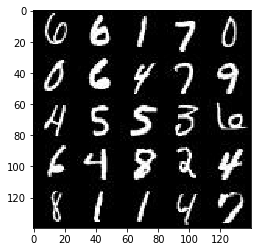

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

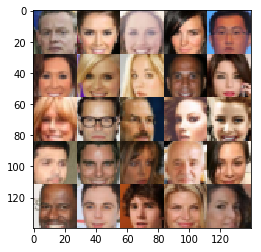

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    lr = tf.placeholder(tf.float32, (), name="lr")
                           

    return (inputs_real, inputs_z, lr)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("discriminator",reuse=reuse ):
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding="same" )
        relu1 = tf.maximum(alpha * x1, x1)
        #14 * 14 * 128
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding="same")
        relu2 = tf.maximum(alpha*x2, x2)
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=1, padding="same")
        relu3 = tf.maximum(alpha*x3, x3)
        
        #x4 = tf.layers.conv2d(relu3, 1024, 5, strides=1, padding="same")
        #relu4 = tf.maximum(alpha*x4, x4)
           
        #7 * 7 * 256
        
        flat = tf.reshape(relu3, (-1, 7*7*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    keep_prob = 0.9
    with tf.variable_scope("generator", reuse=(not is_train)):
        #first connected layer
        x1 = tf.layers.dense(z, 7*7*1024)
        #reshape
        x1 = tf.reshape(x1, (-1, 7, 7, 1024))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        #7*7*256
        
        x2 = tf.layers.conv2d_transpose(x1, 512, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        
        #14*14*128
        
        x3 = tf.layers.conv2d_transpose(x2, 256, 5, strides=1, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        x4 = tf.layers.conv2d_transpose(x3, 128, 5, strides=1, padding="same")
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4 = tf.nn.dropout(x4, keep_prob=keep_prob)
        
        x5 = tf.layers.conv2d_transpose(x4, 64, 5, strides=1, padding="same")
        x5 = tf.layers.batch_normalization(x5, training=is_train)
        x5 = tf.maximum(alpha * x5, x5)
        #output
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=2, padding='same')
        
        #28*28*3 now
        
        out = tf.tanh(logits)
        
        
        
        
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim )
    d_model_real, d_logits_real  = discriminator(input_real) 
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels = tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss= d_loss_real + d_loss_fake
        
    return (d_loss, g_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    
    #optimize
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt =tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
import time

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every=10
    show_every = 100
    start = time.time()
    inputs_real , inputs_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z,data_shape[3] )
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    
    
    saver = tf.train.Saver()
    #sample_z = np.random.uniform(-1, 1, size=(56, z_dim))
    dloss, gloss = [], []
    steps = 0
    
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps+=1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_z *= 2
                #run optimizer
                _ = sess.run(d_opt, feed_dict={inputs_real:batch_images, inputs_z:batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={inputs_real:batch_images, inputs_z:batch_z, lr:learning_rate})
                if steps==1:
                    show_generator_output(sess, 25, inputs_z, data_shape[3] , data_image_mode )
                
                if steps % print_every == 0:
                    training_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real:batch_images})
                    training_loss_g = g_loss.eval({inputs_z:batch_z})
                
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator loss: {:.4f}".format(training_loss_d),
                          "Generator loss: {:.4f}".format(training_loss_g)
                         )
                    dloss.append(training_loss_d)
                    gloss.append(training_loss_g)
                if steps % show_every == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3] , data_image_mode )
        
        show_generator_output(sess, 25, inputs_z, data_shape[3] , data_image_mode )    
        saver.save(sess, './generator.ckpt')        
    end = time.time()
    pyplot.figure(figsize=(18, 6))
    pyplot.plot(dloss, label = 'discriminator')
    pyplot.plot(gloss, label = 'generator')
    pyplot.legend()
    pyplot.title('Loss Function');
    print("Total execution time...{}".format((end - start)/60) )
  

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

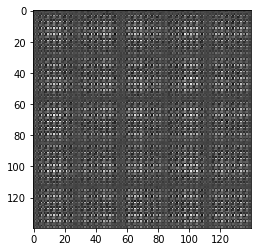

Epoch 1/2... Discriminator loss: 1.6549 Generator loss: 0.3117
Epoch 1/2... Discriminator loss: 2.3340 Generator loss: 0.1617
Epoch 1/2... Discriminator loss: 0.9455 Generator loss: 1.5004
Epoch 1/2... Discriminator loss: 1.1222 Generator loss: 1.2498
Epoch 1/2... Discriminator loss: 0.9437 Generator loss: 1.2653
Epoch 1/2... Discriminator loss: 0.8298 Generator loss: 1.0050
Epoch 1/2... Discriminator loss: 0.5472 Generator loss: 1.6836
Epoch 1/2... Discriminator loss: 1.3256 Generator loss: 4.8524
Epoch 1/2... Discriminator loss: 1.0656 Generator loss: 2.6719
Epoch 1/2... Discriminator loss: 1.1027 Generator loss: 0.6934


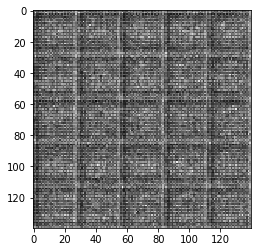

Epoch 1/2... Discriminator loss: 0.9491 Generator loss: 0.8456
Epoch 1/2... Discriminator loss: 0.6585 Generator loss: 2.4035
Epoch 1/2... Discriminator loss: 1.2639 Generator loss: 2.2854
Epoch 1/2... Discriminator loss: 1.2334 Generator loss: 1.3487
Epoch 1/2... Discriminator loss: 2.2175 Generator loss: 0.1741
Epoch 1/2... Discriminator loss: 1.1017 Generator loss: 0.8380
Epoch 1/2... Discriminator loss: 0.7890 Generator loss: 1.5099
Epoch 1/2... Discriminator loss: 0.9021 Generator loss: 2.5102
Epoch 1/2... Discriminator loss: 0.8086 Generator loss: 1.2078
Epoch 1/2... Discriminator loss: 0.7951 Generator loss: 2.1301


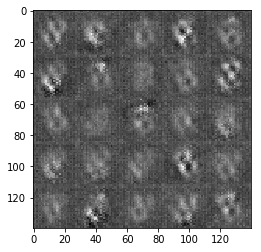

Epoch 1/2... Discriminator loss: 1.1018 Generator loss: 1.8750
Epoch 1/2... Discriminator loss: 0.7959 Generator loss: 1.1603
Epoch 1/2... Discriminator loss: 2.2090 Generator loss: 0.1327
Epoch 1/2... Discriminator loss: 1.0287 Generator loss: 0.9952
Epoch 1/2... Discriminator loss: 1.1572 Generator loss: 0.5048
Epoch 1/2... Discriminator loss: 2.3928 Generator loss: 0.1104
Epoch 1/2... Discriminator loss: 1.0224 Generator loss: 0.6064
Epoch 1/2... Discriminator loss: 1.1830 Generator loss: 2.1071
Epoch 1/2... Discriminator loss: 0.8595 Generator loss: 1.0579
Epoch 1/2... Discriminator loss: 1.8516 Generator loss: 0.2034


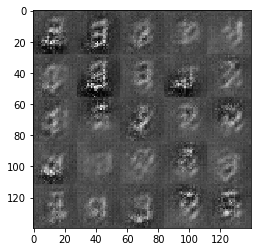

Epoch 1/2... Discriminator loss: 0.9546 Generator loss: 0.9441
Epoch 1/2... Discriminator loss: 0.9505 Generator loss: 2.6580
Epoch 1/2... Discriminator loss: 0.9315 Generator loss: 1.8191
Epoch 1/2... Discriminator loss: 0.6696 Generator loss: 1.4446
Epoch 1/2... Discriminator loss: 1.0990 Generator loss: 0.5763
Epoch 1/2... Discriminator loss: 0.8774 Generator loss: 0.7884
Epoch 1/2... Discriminator loss: 0.9315 Generator loss: 2.0008
Epoch 1/2... Discriminator loss: 1.4532 Generator loss: 0.3207
Epoch 1/2... Discriminator loss: 0.8557 Generator loss: 1.7929
Epoch 1/2... Discriminator loss: 0.7616 Generator loss: 1.0403


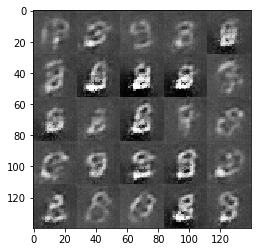

Epoch 1/2... Discriminator loss: 0.8348 Generator loss: 1.0871
Epoch 1/2... Discriminator loss: 1.7744 Generator loss: 0.2254
Epoch 1/2... Discriminator loss: 0.7322 Generator loss: 1.4390
Epoch 1/2... Discriminator loss: 0.7129 Generator loss: 1.0398
Epoch 1/2... Discriminator loss: 1.0774 Generator loss: 2.5521
Epoch 1/2... Discriminator loss: 0.7739 Generator loss: 0.8875
Epoch 1/2... Discriminator loss: 1.0683 Generator loss: 2.2753
Epoch 1/2... Discriminator loss: 0.6972 Generator loss: 1.3142
Epoch 1/2... Discriminator loss: 1.3219 Generator loss: 0.5517
Epoch 1/2... Discriminator loss: 0.6964 Generator loss: 2.1388


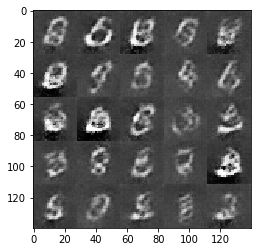

Epoch 1/2... Discriminator loss: 0.6686 Generator loss: 1.6905
Epoch 1/2... Discriminator loss: 0.9178 Generator loss: 1.8822
Epoch 1/2... Discriminator loss: 1.3427 Generator loss: 1.0988
Epoch 1/2... Discriminator loss: 0.6828 Generator loss: 1.6514
Epoch 1/2... Discriminator loss: 1.1136 Generator loss: 0.5944
Epoch 1/2... Discriminator loss: 0.8532 Generator loss: 1.1585
Epoch 1/2... Discriminator loss: 0.8083 Generator loss: 1.0210
Epoch 1/2... Discriminator loss: 0.9442 Generator loss: 1.3080
Epoch 1/2... Discriminator loss: 0.9338 Generator loss: 0.8520
Epoch 1/2... Discriminator loss: 0.8027 Generator loss: 1.4867


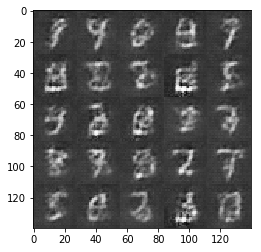

Epoch 1/2... Discriminator loss: 1.0244 Generator loss: 1.3888
Epoch 1/2... Discriminator loss: 0.6646 Generator loss: 1.4469
Epoch 1/2... Discriminator loss: 0.8273 Generator loss: 3.2042
Epoch 1/2... Discriminator loss: 0.8641 Generator loss: 0.9793
Epoch 1/2... Discriminator loss: 0.7166 Generator loss: 1.6267
Epoch 1/2... Discriminator loss: 1.0292 Generator loss: 1.0172
Epoch 1/2... Discriminator loss: 0.7012 Generator loss: 1.1473
Epoch 1/2... Discriminator loss: 0.6549 Generator loss: 1.2866
Epoch 1/2... Discriminator loss: 0.7018 Generator loss: 1.8006
Epoch 1/2... Discriminator loss: 1.2900 Generator loss: 0.4632


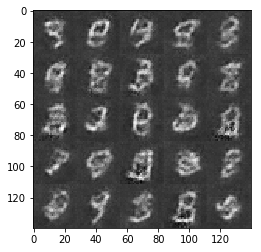

Epoch 1/2... Discriminator loss: 0.7898 Generator loss: 2.3632
Epoch 1/2... Discriminator loss: 0.9991 Generator loss: 1.6284
Epoch 1/2... Discriminator loss: 0.6797 Generator loss: 1.3335
Epoch 1/2... Discriminator loss: 0.9809 Generator loss: 2.2498
Epoch 1/2... Discriminator loss: 1.6848 Generator loss: 0.2481
Epoch 1/2... Discriminator loss: 0.9076 Generator loss: 1.0663
Epoch 1/2... Discriminator loss: 0.7929 Generator loss: 1.0414
Epoch 1/2... Discriminator loss: 0.8784 Generator loss: 1.1051
Epoch 1/2... Discriminator loss: 0.7790 Generator loss: 1.0107
Epoch 1/2... Discriminator loss: 1.5194 Generator loss: 0.3463


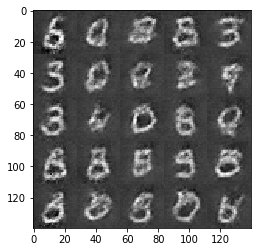

Epoch 1/2... Discriminator loss: 0.7911 Generator loss: 1.5125
Epoch 1/2... Discriminator loss: 0.9825 Generator loss: 1.0957
Epoch 1/2... Discriminator loss: 0.8415 Generator loss: 1.3697
Epoch 1/2... Discriminator loss: 1.4191 Generator loss: 0.3970
Epoch 1/2... Discriminator loss: 1.1586 Generator loss: 0.6702
Epoch 1/2... Discriminator loss: 0.5881 Generator loss: 2.1099
Epoch 1/2... Discriminator loss: 2.4150 Generator loss: 0.1395
Epoch 1/2... Discriminator loss: 0.6541 Generator loss: 1.8151
Epoch 1/2... Discriminator loss: 1.0872 Generator loss: 0.5670
Epoch 1/2... Discriminator loss: 0.8235 Generator loss: 0.9111


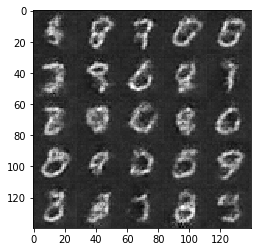

Epoch 1/2... Discriminator loss: 1.4782 Generator loss: 1.3123
Epoch 1/2... Discriminator loss: 0.8526 Generator loss: 0.8460
Epoch 1/2... Discriminator loss: 0.8404 Generator loss: 2.7643
Epoch 1/2... Discriminator loss: 2.0692 Generator loss: 0.1712
Epoch 1/2... Discriminator loss: 0.8106 Generator loss: 1.1064
Epoch 1/2... Discriminator loss: 0.4676 Generator loss: 2.3427
Epoch 1/2... Discriminator loss: 1.5125 Generator loss: 0.6977
Epoch 1/2... Discriminator loss: 0.7590 Generator loss: 1.6682
Epoch 1/2... Discriminator loss: 0.8848 Generator loss: 1.1334
Epoch 1/2... Discriminator loss: 0.7970 Generator loss: 1.0902


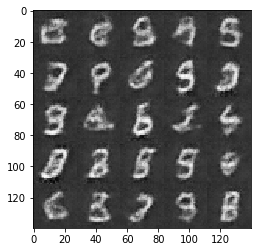

Epoch 1/2... Discriminator loss: 0.9424 Generator loss: 0.8028
Epoch 1/2... Discriminator loss: 0.7838 Generator loss: 0.9328
Epoch 1/2... Discriminator loss: 0.8958 Generator loss: 1.3093
Epoch 1/2... Discriminator loss: 0.9252 Generator loss: 1.8188
Epoch 1/2... Discriminator loss: 0.8600 Generator loss: 0.9857
Epoch 1/2... Discriminator loss: 1.8921 Generator loss: 0.2054
Epoch 1/2... Discriminator loss: 0.7469 Generator loss: 1.1846
Epoch 1/2... Discriminator loss: 0.5204 Generator loss: 1.5590
Epoch 1/2... Discriminator loss: 0.8284 Generator loss: 1.3041
Epoch 1/2... Discriminator loss: 0.8145 Generator loss: 0.8119


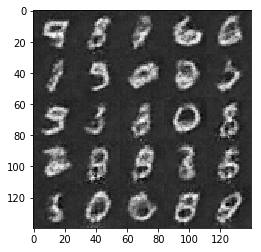

Epoch 1/2... Discriminator loss: 0.9607 Generator loss: 1.2548
Epoch 1/2... Discriminator loss: 0.7278 Generator loss: 1.6018
Epoch 1/2... Discriminator loss: 1.2160 Generator loss: 0.4640
Epoch 1/2... Discriminator loss: 0.6268 Generator loss: 2.0266
Epoch 1/2... Discriminator loss: 0.9484 Generator loss: 0.7408
Epoch 1/2... Discriminator loss: 1.1611 Generator loss: 0.5101
Epoch 1/2... Discriminator loss: 0.9084 Generator loss: 2.1577
Epoch 1/2... Discriminator loss: 0.9234 Generator loss: 1.2033
Epoch 1/2... Discriminator loss: 0.6115 Generator loss: 1.4148
Epoch 1/2... Discriminator loss: 0.8205 Generator loss: 1.1013


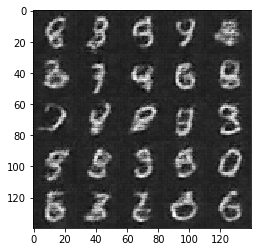

Epoch 1/2... Discriminator loss: 0.8133 Generator loss: 1.9338
Epoch 1/2... Discriminator loss: 0.9190 Generator loss: 0.8600
Epoch 1/2... Discriminator loss: 2.2326 Generator loss: 0.1465
Epoch 1/2... Discriminator loss: 0.9802 Generator loss: 0.7049
Epoch 1/2... Discriminator loss: 0.7420 Generator loss: 1.6662
Epoch 1/2... Discriminator loss: 1.2152 Generator loss: 0.4575
Epoch 1/2... Discriminator loss: 0.7097 Generator loss: 2.0742
Epoch 1/2... Discriminator loss: 2.4648 Generator loss: 2.5600
Epoch 1/2... Discriminator loss: 0.9452 Generator loss: 0.9474
Epoch 1/2... Discriminator loss: 0.6580 Generator loss: 1.1975


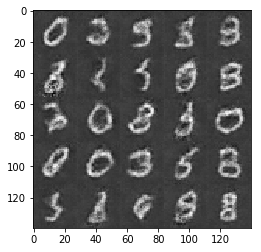

Epoch 1/2... Discriminator loss: 0.9434 Generator loss: 0.7982
Epoch 1/2... Discriminator loss: 0.7373 Generator loss: 1.6135
Epoch 1/2... Discriminator loss: 0.9024 Generator loss: 1.9427
Epoch 1/2... Discriminator loss: 0.7652 Generator loss: 1.2485
Epoch 1/2... Discriminator loss: 0.5911 Generator loss: 1.5051
Epoch 1/2... Discriminator loss: 0.6257 Generator loss: 1.5843
Epoch 1/2... Discriminator loss: 1.5690 Generator loss: 0.3563
Epoch 1/2... Discriminator loss: 0.7719 Generator loss: 0.9992
Epoch 1/2... Discriminator loss: 0.9512 Generator loss: 2.1128
Epoch 1/2... Discriminator loss: 0.8672 Generator loss: 0.9952


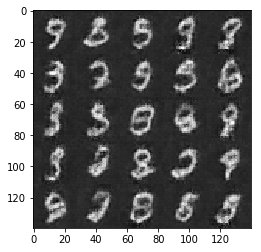

Epoch 1/2... Discriminator loss: 0.5499 Generator loss: 1.9594
Epoch 1/2... Discriminator loss: 0.8869 Generator loss: 0.7960
Epoch 1/2... Discriminator loss: 1.2899 Generator loss: 0.7026
Epoch 1/2... Discriminator loss: 0.8670 Generator loss: 1.1610
Epoch 1/2... Discriminator loss: 0.7900 Generator loss: 1.0676
Epoch 1/2... Discriminator loss: 0.5216 Generator loss: 1.4993
Epoch 1/2... Discriminator loss: 0.7209 Generator loss: 2.2123
Epoch 1/2... Discriminator loss: 0.6705 Generator loss: 1.9971
Epoch 1/2... Discriminator loss: 1.1675 Generator loss: 0.6036
Epoch 1/2... Discriminator loss: 0.7519 Generator loss: 1.3498


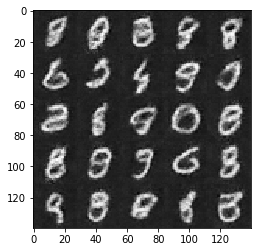

Epoch 1/2... Discriminator loss: 1.9852 Generator loss: 0.2270
Epoch 1/2... Discriminator loss: 0.7554 Generator loss: 1.6446
Epoch 1/2... Discriminator loss: 0.9967 Generator loss: 1.8781
Epoch 1/2... Discriminator loss: 0.7601 Generator loss: 1.8361
Epoch 1/2... Discriminator loss: 0.6070 Generator loss: 2.0018
Epoch 1/2... Discriminator loss: 0.8898 Generator loss: 0.8908
Epoch 1/2... Discriminator loss: 0.7416 Generator loss: 2.4151
Epoch 1/2... Discriminator loss: 0.9378 Generator loss: 3.2719
Epoch 1/2... Discriminator loss: 0.5427 Generator loss: 1.8924
Epoch 1/2... Discriminator loss: 1.6023 Generator loss: 3.9940


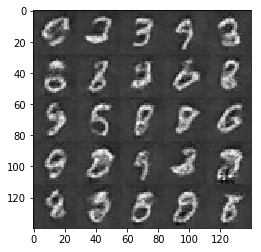

Epoch 1/2... Discriminator loss: 0.8538 Generator loss: 1.2782
Epoch 1/2... Discriminator loss: 0.6657 Generator loss: 1.3412
Epoch 1/2... Discriminator loss: 0.7981 Generator loss: 1.0239
Epoch 1/2... Discriminator loss: 0.4262 Generator loss: 1.5815
Epoch 1/2... Discriminator loss: 1.0725 Generator loss: 0.5347
Epoch 1/2... Discriminator loss: 0.6899 Generator loss: 1.7522
Epoch 1/2... Discriminator loss: 0.9188 Generator loss: 0.8158
Epoch 1/2... Discriminator loss: 0.9531 Generator loss: 0.8085
Epoch 1/2... Discriminator loss: 0.6610 Generator loss: 2.2925
Epoch 1/2... Discriminator loss: 0.6590 Generator loss: 1.3029


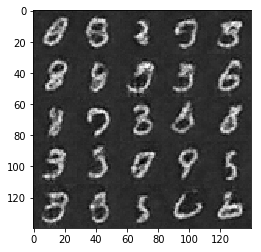

Epoch 1/2... Discriminator loss: 1.1384 Generator loss: 0.6407
Epoch 1/2... Discriminator loss: 1.0939 Generator loss: 0.7726
Epoch 1/2... Discriminator loss: 0.9609 Generator loss: 1.1256
Epoch 1/2... Discriminator loss: 0.8903 Generator loss: 0.6928
Epoch 1/2... Discriminator loss: 0.8230 Generator loss: 0.8508
Epoch 1/2... Discriminator loss: 0.6675 Generator loss: 2.9395
Epoch 1/2... Discriminator loss: 1.9770 Generator loss: 0.2353
Epoch 1/2... Discriminator loss: 0.5152 Generator loss: 1.8263
Epoch 1/2... Discriminator loss: 1.3465 Generator loss: 0.3735
Epoch 1/2... Discriminator loss: 0.6974 Generator loss: 1.4222


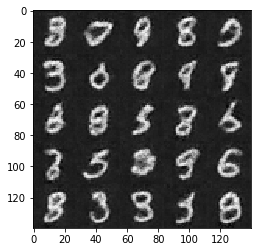

Epoch 1/2... Discriminator loss: 0.9774 Generator loss: 0.6543
Epoch 1/2... Discriminator loss: 0.7543 Generator loss: 0.9341
Epoch 1/2... Discriminator loss: 1.1578 Generator loss: 0.9721
Epoch 1/2... Discriminator loss: 0.9975 Generator loss: 0.8561
Epoch 1/2... Discriminator loss: 1.1311 Generator loss: 0.7842
Epoch 1/2... Discriminator loss: 1.1811 Generator loss: 0.5328
Epoch 1/2... Discriminator loss: 0.6380 Generator loss: 1.2919
Epoch 1/2... Discriminator loss: 0.5425 Generator loss: 1.7296
Epoch 1/2... Discriminator loss: 0.7239 Generator loss: 1.2724
Epoch 1/2... Discriminator loss: 0.8661 Generator loss: 0.9375


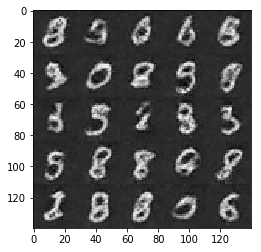

Epoch 1/2... Discriminator loss: 0.9838 Generator loss: 0.7199
Epoch 1/2... Discriminator loss: 1.4720 Generator loss: 3.2418
Epoch 1/2... Discriminator loss: 0.8595 Generator loss: 0.9965
Epoch 1/2... Discriminator loss: 0.6337 Generator loss: 1.4719
Epoch 1/2... Discriminator loss: 0.7731 Generator loss: 1.2872
Epoch 1/2... Discriminator loss: 0.5208 Generator loss: 1.7736
Epoch 1/2... Discriminator loss: 0.6942 Generator loss: 1.2532
Epoch 1/2... Discriminator loss: 1.3807 Generator loss: 3.9518
Epoch 1/2... Discriminator loss: 0.6997 Generator loss: 1.2952
Epoch 1/2... Discriminator loss: 0.7897 Generator loss: 2.0079


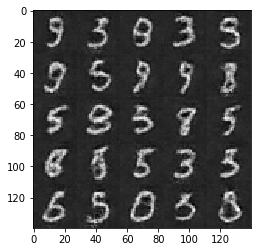

Epoch 1/2... Discriminator loss: 0.5778 Generator loss: 1.3149
Epoch 1/2... Discriminator loss: 2.1046 Generator loss: 5.6995
Epoch 1/2... Discriminator loss: 0.6863 Generator loss: 1.6142
Epoch 1/2... Discriminator loss: 0.5484 Generator loss: 1.4600
Epoch 1/2... Discriminator loss: 0.6131 Generator loss: 1.7076
Epoch 1/2... Discriminator loss: 0.4200 Generator loss: 1.9937
Epoch 1/2... Discriminator loss: 0.8603 Generator loss: 1.0386
Epoch 1/2... Discriminator loss: 0.4621 Generator loss: 1.7096
Epoch 1/2... Discriminator loss: 0.6527 Generator loss: 2.2575
Epoch 1/2... Discriminator loss: 0.9645 Generator loss: 0.6840


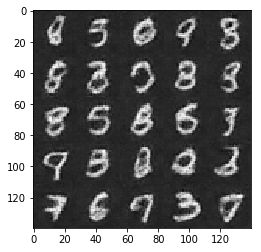

Epoch 1/2... Discriminator loss: 0.7421 Generator loss: 2.4560
Epoch 1/2... Discriminator loss: 0.5622 Generator loss: 1.8666
Epoch 1/2... Discriminator loss: 0.9436 Generator loss: 0.8787
Epoch 1/2... Discriminator loss: 0.5082 Generator loss: 1.4771
Epoch 1/2... Discriminator loss: 0.5639 Generator loss: 2.2305
Epoch 1/2... Discriminator loss: 0.5050 Generator loss: 1.7168
Epoch 1/2... Discriminator loss: 0.7521 Generator loss: 1.1059
Epoch 1/2... Discriminator loss: 0.9944 Generator loss: 0.9890
Epoch 1/2... Discriminator loss: 0.6484 Generator loss: 2.0375
Epoch 1/2... Discriminator loss: 0.4597 Generator loss: 2.3311


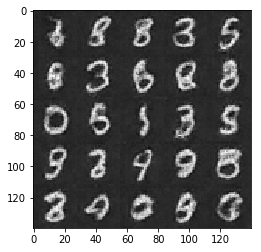

Epoch 1/2... Discriminator loss: 1.2107 Generator loss: 3.6094
Epoch 1/2... Discriminator loss: 0.5824 Generator loss: 2.1521
Epoch 1/2... Discriminator loss: 0.8060 Generator loss: 3.8193
Epoch 1/2... Discriminator loss: 0.6033 Generator loss: 1.1477
Epoch 1/2... Discriminator loss: 0.9124 Generator loss: 0.9338
Epoch 1/2... Discriminator loss: 0.5649 Generator loss: 3.3990
Epoch 1/2... Discriminator loss: 0.4073 Generator loss: 2.8532
Epoch 1/2... Discriminator loss: 0.4477 Generator loss: 3.0667
Epoch 1/2... Discriminator loss: 0.4251 Generator loss: 1.5817
Epoch 1/2... Discriminator loss: 0.5106 Generator loss: 3.3707


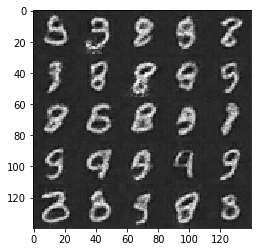

Epoch 1/2... Discriminator loss: 0.4072 Generator loss: 2.1125
Epoch 1/2... Discriminator loss: 0.9023 Generator loss: 0.7955
Epoch 1/2... Discriminator loss: 1.1333 Generator loss: 0.6199
Epoch 1/2... Discriminator loss: 0.5356 Generator loss: 2.0979
Epoch 1/2... Discriminator loss: 1.2784 Generator loss: 0.4323
Epoch 1/2... Discriminator loss: 0.3976 Generator loss: 3.1409
Epoch 1/2... Discriminator loss: 0.9590 Generator loss: 0.8051
Epoch 1/2... Discriminator loss: 1.1237 Generator loss: 3.6578
Epoch 1/2... Discriminator loss: 0.4580 Generator loss: 1.9539
Epoch 1/2... Discriminator loss: 0.5486 Generator loss: 2.3487


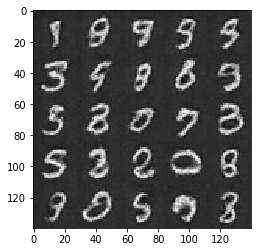

Epoch 1/2... Discriminator loss: 0.5525 Generator loss: 1.1459
Epoch 1/2... Discriminator loss: 0.4519 Generator loss: 2.3910
Epoch 1/2... Discriminator loss: 1.2710 Generator loss: 0.4322
Epoch 1/2... Discriminator loss: 0.5580 Generator loss: 1.7046
Epoch 1/2... Discriminator loss: 0.5004 Generator loss: 1.8236
Epoch 1/2... Discriminator loss: 0.3673 Generator loss: 1.7321
Epoch 1/2... Discriminator loss: 0.7035 Generator loss: 1.3308
Epoch 1/2... Discriminator loss: 0.5803 Generator loss: 2.2805
Epoch 1/2... Discriminator loss: 0.5228 Generator loss: 2.2024
Epoch 1/2... Discriminator loss: 0.6575 Generator loss: 1.0932


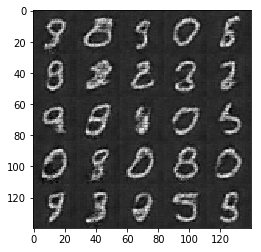

Epoch 1/2... Discriminator loss: 1.3191 Generator loss: 0.6801
Epoch 1/2... Discriminator loss: 1.3786 Generator loss: 0.4252
Epoch 1/2... Discriminator loss: 0.6167 Generator loss: 2.5021
Epoch 1/2... Discriminator loss: 0.5030 Generator loss: 1.2763
Epoch 1/2... Discriminator loss: 0.4288 Generator loss: 2.1551
Epoch 1/2... Discriminator loss: 0.7803 Generator loss: 0.8245
Epoch 1/2... Discriminator loss: 0.6548 Generator loss: 1.3390
Epoch 1/2... Discriminator loss: 0.4850 Generator loss: 2.6749
Epoch 1/2... Discriminator loss: 0.9909 Generator loss: 4.3260
Epoch 1/2... Discriminator loss: 0.3513 Generator loss: 2.6677


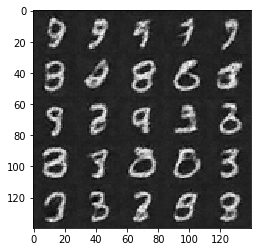

Epoch 1/2... Discriminator loss: 0.5748 Generator loss: 1.1123
Epoch 1/2... Discriminator loss: 0.6418 Generator loss: 2.8330
Epoch 1/2... Discriminator loss: 0.8536 Generator loss: 0.9622
Epoch 1/2... Discriminator loss: 2.0707 Generator loss: 0.2762
Epoch 1/2... Discriminator loss: 0.5081 Generator loss: 2.2957
Epoch 1/2... Discriminator loss: 1.4259 Generator loss: 0.4482
Epoch 1/2... Discriminator loss: 0.8699 Generator loss: 2.5198
Epoch 1/2... Discriminator loss: 0.7294 Generator loss: 0.9869
Epoch 1/2... Discriminator loss: 0.5730 Generator loss: 1.5218
Epoch 1/2... Discriminator loss: 0.7067 Generator loss: 1.3927


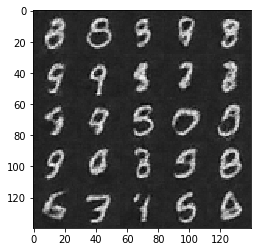

Epoch 1/2... Discriminator loss: 0.5559 Generator loss: 1.7973
Epoch 1/2... Discriminator loss: 0.7861 Generator loss: 1.2807
Epoch 1/2... Discriminator loss: 0.4386 Generator loss: 2.0291
Epoch 1/2... Discriminator loss: 0.4518 Generator loss: 1.7945
Epoch 1/2... Discriminator loss: 0.3775 Generator loss: 2.5005
Epoch 1/2... Discriminator loss: 0.4734 Generator loss: 3.3758
Epoch 1/2... Discriminator loss: 0.5892 Generator loss: 2.4057
Epoch 1/2... Discriminator loss: 0.5611 Generator loss: 1.2496
Epoch 1/2... Discriminator loss: 0.5669 Generator loss: 1.3632
Epoch 1/2... Discriminator loss: 0.4046 Generator loss: 2.9396


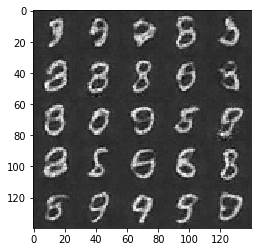

Epoch 1/2... Discriminator loss: 0.7171 Generator loss: 4.2207
Epoch 1/2... Discriminator loss: 0.5053 Generator loss: 1.7118
Epoch 1/2... Discriminator loss: 1.1874 Generator loss: 0.5546
Epoch 1/2... Discriminator loss: 0.8052 Generator loss: 1.0217
Epoch 1/2... Discriminator loss: 0.4273 Generator loss: 2.3610
Epoch 1/2... Discriminator loss: 0.9844 Generator loss: 0.6893
Epoch 1/2... Discriminator loss: 0.5228 Generator loss: 1.4770
Epoch 1/2... Discriminator loss: 0.9140 Generator loss: 0.7617
Epoch 1/2... Discriminator loss: 0.5437 Generator loss: 1.5757
Epoch 1/2... Discriminator loss: 1.7261 Generator loss: 0.3390


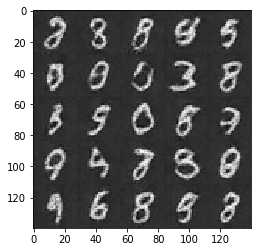

Epoch 1/2... Discriminator loss: 1.0063 Generator loss: 1.0323
Epoch 1/2... Discriminator loss: 0.8308 Generator loss: 1.2183
Epoch 1/2... Discriminator loss: 0.5787 Generator loss: 2.1787
Epoch 1/2... Discriminator loss: 1.0179 Generator loss: 0.8430
Epoch 1/2... Discriminator loss: 0.4552 Generator loss: 1.5747
Epoch 1/2... Discriminator loss: 0.5567 Generator loss: 1.2055
Epoch 1/2... Discriminator loss: 0.5987 Generator loss: 2.5419
Epoch 1/2... Discriminator loss: 0.3128 Generator loss: 2.0799
Epoch 1/2... Discriminator loss: 0.4041 Generator loss: 1.8371
Epoch 1/2... Discriminator loss: 0.4549 Generator loss: 2.0064


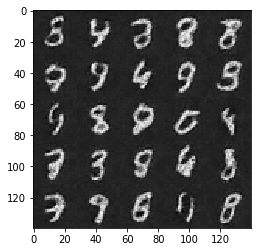

Epoch 1/2... Discriminator loss: 0.8798 Generator loss: 4.4752
Epoch 1/2... Discriminator loss: 0.6687 Generator loss: 1.2289
Epoch 1/2... Discriminator loss: 0.6124 Generator loss: 1.2535
Epoch 1/2... Discriminator loss: 0.5844 Generator loss: 2.0281
Epoch 1/2... Discriminator loss: 1.2057 Generator loss: 0.5477
Epoch 1/2... Discriminator loss: 0.4091 Generator loss: 2.3571
Epoch 1/2... Discriminator loss: 0.4567 Generator loss: 2.7837
Epoch 1/2... Discriminator loss: 0.7957 Generator loss: 1.2233
Epoch 1/2... Discriminator loss: 0.5035 Generator loss: 1.8496
Epoch 1/2... Discriminator loss: 0.4116 Generator loss: 1.8566


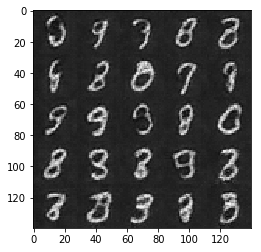

Epoch 1/2... Discriminator loss: 0.3925 Generator loss: 2.1426
Epoch 1/2... Discriminator loss: 0.7653 Generator loss: 1.1833
Epoch 1/2... Discriminator loss: 0.4025 Generator loss: 2.4619
Epoch 1/2... Discriminator loss: 0.4460 Generator loss: 2.7241
Epoch 1/2... Discriminator loss: 0.9588 Generator loss: 0.9462
Epoch 1/2... Discriminator loss: 0.5446 Generator loss: 2.3442
Epoch 1/2... Discriminator loss: 0.4269 Generator loss: 2.1565
Epoch 1/2... Discriminator loss: 0.6730 Generator loss: 1.3810
Epoch 1/2... Discriminator loss: 0.5912 Generator loss: 1.5343
Epoch 1/2... Discriminator loss: 0.3418 Generator loss: 2.2668


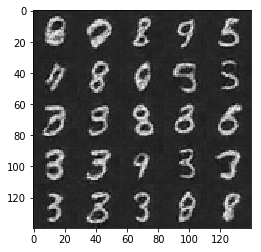

Epoch 1/2... Discriminator loss: 0.6484 Generator loss: 1.1848
Epoch 1/2... Discriminator loss: 0.3469 Generator loss: 2.1317
Epoch 1/2... Discriminator loss: 0.4641 Generator loss: 1.8843
Epoch 1/2... Discriminator loss: 0.4645 Generator loss: 1.6839
Epoch 1/2... Discriminator loss: 0.7047 Generator loss: 2.3638
Epoch 1/2... Discriminator loss: 0.3295 Generator loss: 2.2825
Epoch 1/2... Discriminator loss: 0.7532 Generator loss: 1.0104
Epoch 1/2... Discriminator loss: 0.7154 Generator loss: 0.9247
Epoch 1/2... Discriminator loss: 0.5685 Generator loss: 3.8839
Epoch 1/2... Discriminator loss: 0.4043 Generator loss: 2.9028


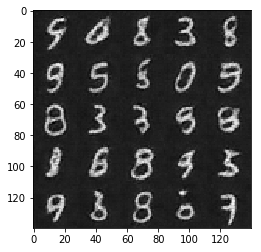

Epoch 1/2... Discriminator loss: 0.4282 Generator loss: 3.6845
Epoch 1/2... Discriminator loss: 0.2482 Generator loss: 3.1397
Epoch 1/2... Discriminator loss: 0.5467 Generator loss: 3.8095
Epoch 1/2... Discriminator loss: 0.3563 Generator loss: 2.8776
Epoch 1/2... Discriminator loss: 0.7731 Generator loss: 1.6662
Epoch 1/2... Discriminator loss: 0.7349 Generator loss: 1.9322
Epoch 1/2... Discriminator loss: 0.3258 Generator loss: 2.7952
Epoch 1/2... Discriminator loss: 0.4758 Generator loss: 1.3611
Epoch 1/2... Discriminator loss: 1.0006 Generator loss: 0.6914
Epoch 1/2... Discriminator loss: 0.6785 Generator loss: 1.0536


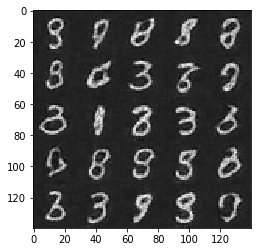

Epoch 1/2... Discriminator loss: 0.7894 Generator loss: 3.7875
Epoch 1/2... Discriminator loss: 0.9432 Generator loss: 0.6465
Epoch 1/2... Discriminator loss: 0.5617 Generator loss: 1.3839
Epoch 1/2... Discriminator loss: 0.5630 Generator loss: 1.2256
Epoch 1/2... Discriminator loss: 2.2443 Generator loss: 3.7088
Epoch 1/2... Discriminator loss: 0.4242 Generator loss: 2.9282
Epoch 1/2... Discriminator loss: 0.5933 Generator loss: 3.2373
Epoch 1/2... Discriminator loss: 0.2865 Generator loss: 2.5134
Epoch 1/2... Discriminator loss: 0.4822 Generator loss: 2.8649
Epoch 1/2... Discriminator loss: 0.3796 Generator loss: 2.1070


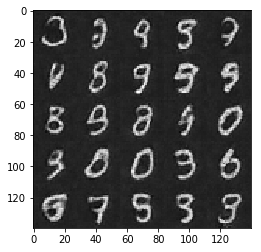

Epoch 1/2... Discriminator loss: 0.7851 Generator loss: 4.4383
Epoch 1/2... Discriminator loss: 0.2748 Generator loss: 2.7558
Epoch 1/2... Discriminator loss: 0.7409 Generator loss: 1.3644
Epoch 1/2... Discriminator loss: 0.4121 Generator loss: 2.8387
Epoch 1/2... Discriminator loss: 0.3524 Generator loss: 1.8743
Epoch 1/2... Discriminator loss: 0.5331 Generator loss: 1.3370
Epoch 1/2... Discriminator loss: 0.7385 Generator loss: 2.4236
Epoch 1/2... Discriminator loss: 0.6021 Generator loss: 1.2068
Epoch 1/2... Discriminator loss: 1.5749 Generator loss: 0.2749
Epoch 1/2... Discriminator loss: 0.4949 Generator loss: 2.3960


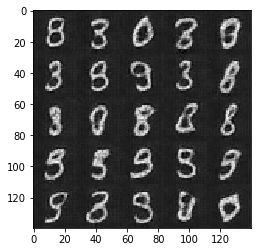

Epoch 1/2... Discriminator loss: 0.5354 Generator loss: 1.6584
Epoch 1/2... Discriminator loss: 0.8143 Generator loss: 0.9805
Epoch 1/2... Discriminator loss: 0.3684 Generator loss: 3.4052
Epoch 1/2... Discriminator loss: 0.8668 Generator loss: 0.8230
Epoch 1/2... Discriminator loss: 0.5997 Generator loss: 1.1748
Epoch 1/2... Discriminator loss: 0.5331 Generator loss: 2.4497
Epoch 1/2... Discriminator loss: 0.7340 Generator loss: 1.0937
Epoch 1/2... Discriminator loss: 0.7227 Generator loss: 3.0150
Epoch 1/2... Discriminator loss: 0.5152 Generator loss: 1.6065
Epoch 1/2... Discriminator loss: 0.2991 Generator loss: 1.9943


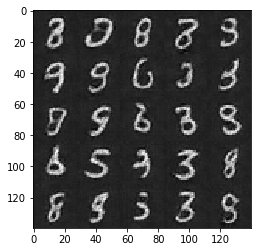

Epoch 1/2... Discriminator loss: 0.1653 Generator loss: 3.4479
Epoch 1/2... Discriminator loss: 0.4842 Generator loss: 2.1735
Epoch 1/2... Discriminator loss: 0.5745 Generator loss: 1.0744
Epoch 1/2... Discriminator loss: 0.5393 Generator loss: 1.3332
Epoch 1/2... Discriminator loss: 0.3282 Generator loss: 2.3984
Epoch 2/2... Discriminator loss: 0.6267 Generator loss: 2.0764
Epoch 2/2... Discriminator loss: 0.7563 Generator loss: 1.3248
Epoch 2/2... Discriminator loss: 0.3361 Generator loss: 2.8322
Epoch 2/2... Discriminator loss: 0.3843 Generator loss: 3.8123
Epoch 2/2... Discriminator loss: 0.4403 Generator loss: 2.2640


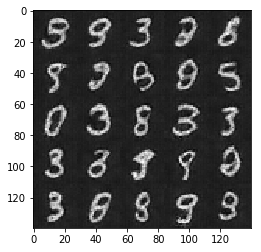

Epoch 2/2... Discriminator loss: 0.4871 Generator loss: 1.8527
Epoch 2/2... Discriminator loss: 0.3920 Generator loss: 2.1893
Epoch 2/2... Discriminator loss: 0.4819 Generator loss: 1.5743
Epoch 2/2... Discriminator loss: 0.8665 Generator loss: 1.1030
Epoch 2/2... Discriminator loss: 0.6409 Generator loss: 1.1249
Epoch 2/2... Discriminator loss: 0.6451 Generator loss: 3.8518
Epoch 2/2... Discriminator loss: 0.3712 Generator loss: 2.5312
Epoch 2/2... Discriminator loss: 0.5583 Generator loss: 0.9212
Epoch 2/2... Discriminator loss: 0.7260 Generator loss: 4.5432
Epoch 2/2... Discriminator loss: 0.3708 Generator loss: 2.5803


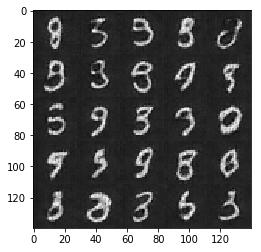

Epoch 2/2... Discriminator loss: 0.8027 Generator loss: 1.0389
Epoch 2/2... Discriminator loss: 0.3318 Generator loss: 2.8520
Epoch 2/2... Discriminator loss: 0.5440 Generator loss: 2.8206
Epoch 2/2... Discriminator loss: 0.6289 Generator loss: 3.6142
Epoch 2/2... Discriminator loss: 0.7803 Generator loss: 1.0879
Epoch 2/2... Discriminator loss: 0.2787 Generator loss: 3.6329
Epoch 2/2... Discriminator loss: 0.6667 Generator loss: 1.4772
Epoch 2/2... Discriminator loss: 0.6894 Generator loss: 1.2450
Epoch 2/2... Discriminator loss: 0.8631 Generator loss: 1.1401
Epoch 2/2... Discriminator loss: 0.2397 Generator loss: 2.3643


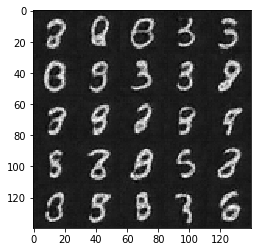

Epoch 2/2... Discriminator loss: 0.4885 Generator loss: 2.9575
Epoch 2/2... Discriminator loss: 0.6280 Generator loss: 2.4272
Epoch 2/2... Discriminator loss: 0.5233 Generator loss: 1.6771
Epoch 2/2... Discriminator loss: 0.5431 Generator loss: 1.6908
Epoch 2/2... Discriminator loss: 0.7016 Generator loss: 1.6726
Epoch 2/2... Discriminator loss: 0.7399 Generator loss: 1.0426
Epoch 2/2... Discriminator loss: 0.5634 Generator loss: 3.3270
Epoch 2/2... Discriminator loss: 0.3003 Generator loss: 3.2358
Epoch 2/2... Discriminator loss: 0.6917 Generator loss: 3.7914
Epoch 2/2... Discriminator loss: 1.1661 Generator loss: 3.6643


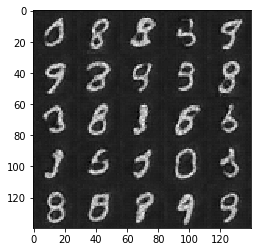

Epoch 2/2... Discriminator loss: 0.3719 Generator loss: 2.7279
Epoch 2/2... Discriminator loss: 0.6845 Generator loss: 2.8186
Epoch 2/2... Discriminator loss: 0.6361 Generator loss: 1.1954
Epoch 2/2... Discriminator loss: 0.8295 Generator loss: 0.6648
Epoch 2/2... Discriminator loss: 0.4142 Generator loss: 4.4624
Epoch 2/2... Discriminator loss: 0.7855 Generator loss: 0.9705
Epoch 2/2... Discriminator loss: 0.6550 Generator loss: 1.5367
Epoch 2/2... Discriminator loss: 0.3622 Generator loss: 2.4316
Epoch 2/2... Discriminator loss: 0.9067 Generator loss: 1.1086
Epoch 2/2... Discriminator loss: 0.5599 Generator loss: 2.4569


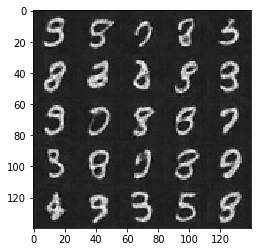

Epoch 2/2... Discriminator loss: 0.4353 Generator loss: 1.7396
Epoch 2/2... Discriminator loss: 0.5548 Generator loss: 1.3033
Epoch 2/2... Discriminator loss: 0.4506 Generator loss: 2.1979
Epoch 2/2... Discriminator loss: 1.1887 Generator loss: 0.4280
Epoch 2/2... Discriminator loss: 0.8187 Generator loss: 0.8873
Epoch 2/2... Discriminator loss: 0.4137 Generator loss: 2.4110
Epoch 2/2... Discriminator loss: 0.3837 Generator loss: 3.3793
Epoch 2/2... Discriminator loss: 1.1577 Generator loss: 3.4605
Epoch 2/2... Discriminator loss: 0.7486 Generator loss: 1.2390
Epoch 2/2... Discriminator loss: 0.2205 Generator loss: 2.7271


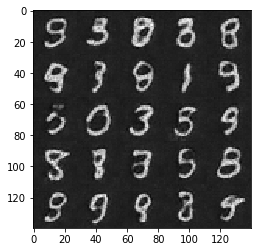

Epoch 2/2... Discriminator loss: 0.4909 Generator loss: 1.8008
Epoch 2/2... Discriminator loss: 0.9799 Generator loss: 0.8815
Epoch 2/2... Discriminator loss: 0.6386 Generator loss: 3.6949
Epoch 2/2... Discriminator loss: 0.4927 Generator loss: 1.5172
Epoch 2/2... Discriminator loss: 0.3914 Generator loss: 1.7113
Epoch 2/2... Discriminator loss: 0.9127 Generator loss: 0.9736
Epoch 2/2... Discriminator loss: 0.6937 Generator loss: 2.6117
Epoch 2/2... Discriminator loss: 0.4681 Generator loss: 1.8055
Epoch 2/2... Discriminator loss: 0.5948 Generator loss: 1.1730
Epoch 2/2... Discriminator loss: 0.4121 Generator loss: 1.8423


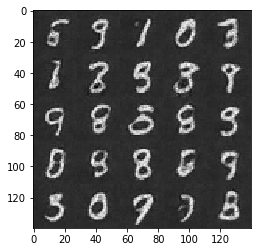

Epoch 2/2... Discriminator loss: 0.4140 Generator loss: 2.3684
Epoch 2/2... Discriminator loss: 0.6358 Generator loss: 1.4433
Epoch 2/2... Discriminator loss: 0.5744 Generator loss: 2.7555
Epoch 2/2... Discriminator loss: 0.4648 Generator loss: 3.2242
Epoch 2/2... Discriminator loss: 0.4555 Generator loss: 1.7639
Epoch 2/2... Discriminator loss: 0.4686 Generator loss: 3.5579
Epoch 2/2... Discriminator loss: 0.4855 Generator loss: 3.4163
Epoch 2/2... Discriminator loss: 0.3044 Generator loss: 2.5633
Epoch 2/2... Discriminator loss: 0.7652 Generator loss: 0.7682
Epoch 2/2... Discriminator loss: 0.3602 Generator loss: 3.0231


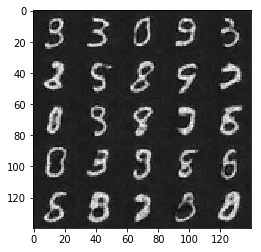

Epoch 2/2... Discriminator loss: 0.4139 Generator loss: 1.6230
Epoch 2/2... Discriminator loss: 0.4173 Generator loss: 2.0539
Epoch 2/2... Discriminator loss: 0.5218 Generator loss: 1.4480
Epoch 2/2... Discriminator loss: 0.3030 Generator loss: 1.8727
Epoch 2/2... Discriminator loss: 0.2570 Generator loss: 5.4987
Epoch 2/2... Discriminator loss: 0.9124 Generator loss: 0.6118
Epoch 2/2... Discriminator loss: 0.6537 Generator loss: 4.8869
Epoch 2/2... Discriminator loss: 0.4360 Generator loss: 1.9639
Epoch 2/2... Discriminator loss: 0.4896 Generator loss: 1.4868
Epoch 2/2... Discriminator loss: 0.6122 Generator loss: 1.5946


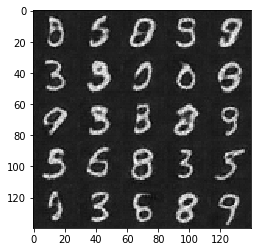

Epoch 2/2... Discriminator loss: 0.9277 Generator loss: 0.7999
Epoch 2/2... Discriminator loss: 0.3052 Generator loss: 1.8810
Epoch 2/2... Discriminator loss: 0.4430 Generator loss: 3.1523
Epoch 2/2... Discriminator loss: 1.0171 Generator loss: 0.6035
Epoch 2/2... Discriminator loss: 0.4703 Generator loss: 2.4918
Epoch 2/2... Discriminator loss: 0.6708 Generator loss: 1.5866
Epoch 2/2... Discriminator loss: 0.5617 Generator loss: 1.6041
Epoch 2/2... Discriminator loss: 0.6032 Generator loss: 1.7735
Epoch 2/2... Discriminator loss: 0.5189 Generator loss: 1.2656
Epoch 2/2... Discriminator loss: 0.3947 Generator loss: 2.2170


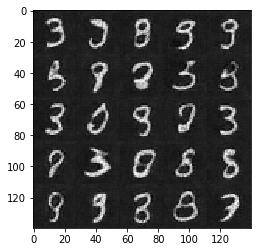

Epoch 2/2... Discriminator loss: 0.3854 Generator loss: 1.7149
Epoch 2/2... Discriminator loss: 0.4458 Generator loss: 2.2578
Epoch 2/2... Discriminator loss: 0.4536 Generator loss: 1.7731
Epoch 2/2... Discriminator loss: 0.2667 Generator loss: 2.9325
Epoch 2/2... Discriminator loss: 0.7020 Generator loss: 1.2164
Epoch 2/2... Discriminator loss: 0.6505 Generator loss: 2.2267
Epoch 2/2... Discriminator loss: 0.5364 Generator loss: 1.2668
Epoch 2/2... Discriminator loss: 0.4712 Generator loss: 1.3217
Epoch 2/2... Discriminator loss: 0.4486 Generator loss: 1.1670
Epoch 2/2... Discriminator loss: 1.0761 Generator loss: 0.8079


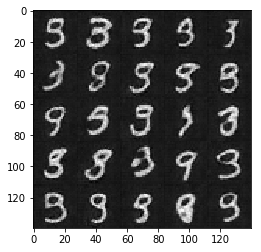

Epoch 2/2... Discriminator loss: 0.4239 Generator loss: 1.4472
Epoch 2/2... Discriminator loss: 0.7195 Generator loss: 1.2418
Epoch 2/2... Discriminator loss: 0.4260 Generator loss: 2.2121
Epoch 2/2... Discriminator loss: 0.7030 Generator loss: 3.2023
Epoch 2/2... Discriminator loss: 0.9839 Generator loss: 0.7903
Epoch 2/2... Discriminator loss: 0.3604 Generator loss: 2.4169
Epoch 2/2... Discriminator loss: 0.3866 Generator loss: 2.7582
Epoch 2/2... Discriminator loss: 0.4854 Generator loss: 1.3266
Epoch 2/2... Discriminator loss: 0.4782 Generator loss: 2.2757
Epoch 2/2... Discriminator loss: 0.4725 Generator loss: 3.6964


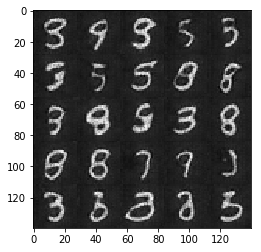

Epoch 2/2... Discriminator loss: 0.6864 Generator loss: 1.4362
Epoch 2/2... Discriminator loss: 0.4717 Generator loss: 1.6472
Epoch 2/2... Discriminator loss: 0.5298 Generator loss: 1.5774
Epoch 2/2... Discriminator loss: 0.4288 Generator loss: 2.7717
Epoch 2/2... Discriminator loss: 0.9666 Generator loss: 0.6901
Epoch 2/2... Discriminator loss: 0.4844 Generator loss: 2.5354
Epoch 2/2... Discriminator loss: 0.5111 Generator loss: 1.6542
Epoch 2/2... Discriminator loss: 0.6496 Generator loss: 1.0554
Epoch 2/2... Discriminator loss: 0.7695 Generator loss: 0.9490
Epoch 2/2... Discriminator loss: 0.7945 Generator loss: 2.7484


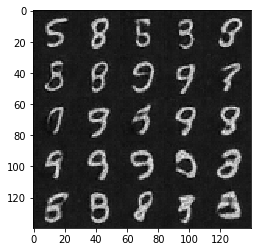

Epoch 2/2... Discriminator loss: 0.4747 Generator loss: 2.4620
Epoch 2/2... Discriminator loss: 0.7629 Generator loss: 1.6198
Epoch 2/2... Discriminator loss: 0.8779 Generator loss: 0.7698
Epoch 2/2... Discriminator loss: 0.8878 Generator loss: 0.8410
Epoch 2/2... Discriminator loss: 0.6244 Generator loss: 4.0167
Epoch 2/2... Discriminator loss: 0.4006 Generator loss: 2.0887
Epoch 2/2... Discriminator loss: 0.2993 Generator loss: 2.2433
Epoch 2/2... Discriminator loss: 0.6442 Generator loss: 4.4218
Epoch 2/2... Discriminator loss: 0.3373 Generator loss: 1.9940
Epoch 2/2... Discriminator loss: 0.2744 Generator loss: 2.6605


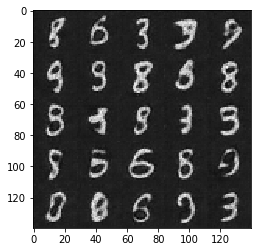

Epoch 2/2... Discriminator loss: 0.4718 Generator loss: 2.9908
Epoch 2/2... Discriminator loss: 0.3974 Generator loss: 2.5575
Epoch 2/2... Discriminator loss: 0.2883 Generator loss: 2.3391
Epoch 2/2... Discriminator loss: 0.9087 Generator loss: 0.6108
Epoch 2/2... Discriminator loss: 0.7817 Generator loss: 0.8327
Epoch 2/2... Discriminator loss: 0.2797 Generator loss: 2.6649
Epoch 2/2... Discriminator loss: 0.3704 Generator loss: 1.7329
Epoch 2/2... Discriminator loss: 0.3510 Generator loss: 1.8874
Epoch 2/2... Discriminator loss: 0.6104 Generator loss: 1.7212
Epoch 2/2... Discriminator loss: 0.4930 Generator loss: 1.2623


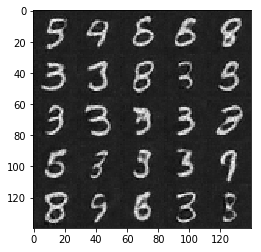

Epoch 2/2... Discriminator loss: 0.6240 Generator loss: 4.5420
Epoch 2/2... Discriminator loss: 0.4078 Generator loss: 1.8176
Epoch 2/2... Discriminator loss: 0.6033 Generator loss: 1.5943
Epoch 2/2... Discriminator loss: 0.3702 Generator loss: 2.0119
Epoch 2/2... Discriminator loss: 0.4306 Generator loss: 2.2749
Epoch 2/2... Discriminator loss: 0.5029 Generator loss: 1.6600
Epoch 2/2... Discriminator loss: 0.3926 Generator loss: 2.4624
Epoch 2/2... Discriminator loss: 0.4636 Generator loss: 1.5207
Epoch 2/2... Discriminator loss: 0.6792 Generator loss: 1.1850
Epoch 2/2... Discriminator loss: 0.3395 Generator loss: 1.9905


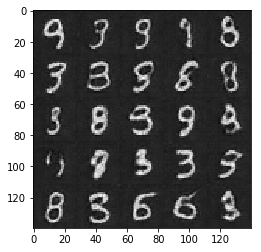

Epoch 2/2... Discriminator loss: 0.9776 Generator loss: 0.7060
Epoch 2/2... Discriminator loss: 0.6722 Generator loss: 1.4895
Epoch 2/2... Discriminator loss: 0.3739 Generator loss: 2.5386
Epoch 2/2... Discriminator loss: 0.3586 Generator loss: 2.4838
Epoch 2/2... Discriminator loss: 2.8008 Generator loss: 3.5223
Epoch 2/2... Discriminator loss: 0.6490 Generator loss: 1.6526
Epoch 2/2... Discriminator loss: 0.5685 Generator loss: 2.0722
Epoch 2/2... Discriminator loss: 0.3219 Generator loss: 2.0275
Epoch 2/2... Discriminator loss: 0.3629 Generator loss: 1.8798
Epoch 2/2... Discriminator loss: 0.4188 Generator loss: 2.4648


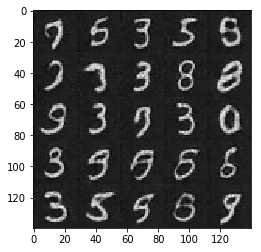

Epoch 2/2... Discriminator loss: 0.4777 Generator loss: 1.6470
Epoch 2/2... Discriminator loss: 0.3175 Generator loss: 1.8306
Epoch 2/2... Discriminator loss: 0.6579 Generator loss: 2.5057
Epoch 2/2... Discriminator loss: 0.7273 Generator loss: 1.2925
Epoch 2/2... Discriminator loss: 0.3839 Generator loss: 2.0853
Epoch 2/2... Discriminator loss: 0.2128 Generator loss: 3.6516
Epoch 2/2... Discriminator loss: 0.6447 Generator loss: 1.0508
Epoch 2/2... Discriminator loss: 0.3606 Generator loss: 2.1159
Epoch 2/2... Discriminator loss: 0.3818 Generator loss: 3.4368
Epoch 2/2... Discriminator loss: 0.4121 Generator loss: 1.6204


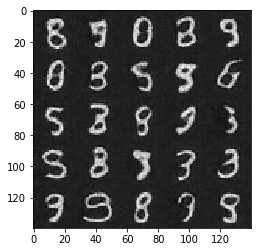

Epoch 2/2... Discriminator loss: 0.4735 Generator loss: 1.2905
Epoch 2/2... Discriminator loss: 0.4027 Generator loss: 1.6603
Epoch 2/2... Discriminator loss: 0.1693 Generator loss: 3.1112
Epoch 2/2... Discriminator loss: 0.4085 Generator loss: 2.9029
Epoch 2/2... Discriminator loss: 0.3665 Generator loss: 3.0638
Epoch 2/2... Discriminator loss: 0.2167 Generator loss: 3.9641
Epoch 2/2... Discriminator loss: 0.7409 Generator loss: 1.2999
Epoch 2/2... Discriminator loss: 0.7007 Generator loss: 1.0109
Epoch 2/2... Discriminator loss: 0.3376 Generator loss: 3.2370
Epoch 2/2... Discriminator loss: 1.1503 Generator loss: 0.5621


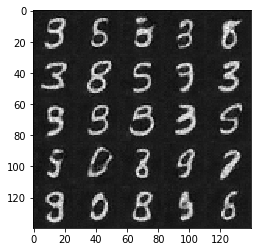

Epoch 2/2... Discriminator loss: 0.7673 Generator loss: 1.1849
Epoch 2/2... Discriminator loss: 0.2507 Generator loss: 1.8467
Epoch 2/2... Discriminator loss: 0.3784 Generator loss: 2.0458
Epoch 2/2... Discriminator loss: 0.8534 Generator loss: 0.7911
Epoch 2/2... Discriminator loss: 0.3566 Generator loss: 2.5230
Epoch 2/2... Discriminator loss: 0.5170 Generator loss: 2.1051
Epoch 2/2... Discriminator loss: 0.6009 Generator loss: 3.5731
Epoch 2/2... Discriminator loss: 0.8168 Generator loss: 1.4691
Epoch 2/2... Discriminator loss: 0.4224 Generator loss: 3.9183
Epoch 2/2... Discriminator loss: 0.4554 Generator loss: 2.0976


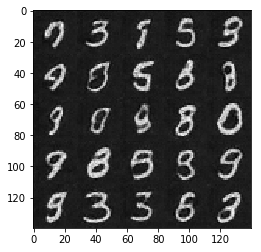

Epoch 2/2... Discriminator loss: 0.5027 Generator loss: 1.5571
Epoch 2/2... Discriminator loss: 0.8262 Generator loss: 1.1053
Epoch 2/2... Discriminator loss: 0.5968 Generator loss: 3.9396
Epoch 2/2... Discriminator loss: 1.2822 Generator loss: 0.5963
Epoch 2/2... Discriminator loss: 0.2522 Generator loss: 2.1128
Epoch 2/2... Discriminator loss: 0.3879 Generator loss: 2.5886
Epoch 2/2... Discriminator loss: 0.3927 Generator loss: 2.5437
Epoch 2/2... Discriminator loss: 0.4123 Generator loss: 4.0790
Epoch 2/2... Discriminator loss: 0.3021 Generator loss: 3.2789
Epoch 2/2... Discriminator loss: 0.8289 Generator loss: 2.7564


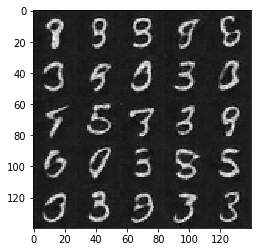

Epoch 2/2... Discriminator loss: 0.4196 Generator loss: 1.8389
Epoch 2/2... Discriminator loss: 0.4246 Generator loss: 2.0290
Epoch 2/2... Discriminator loss: 0.4069 Generator loss: 2.3633
Epoch 2/2... Discriminator loss: 0.3154 Generator loss: 2.3985
Epoch 2/2... Discriminator loss: 0.8465 Generator loss: 0.8083
Epoch 2/2... Discriminator loss: 0.4638 Generator loss: 1.4239
Epoch 2/2... Discriminator loss: 0.2493 Generator loss: 2.2639
Epoch 2/2... Discriminator loss: 0.2797 Generator loss: 1.8924
Epoch 2/2... Discriminator loss: 0.3926 Generator loss: 1.7400
Epoch 2/2... Discriminator loss: 0.4430 Generator loss: 2.8192


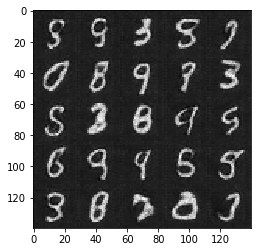

Epoch 2/2... Discriminator loss: 0.3202 Generator loss: 3.2574
Epoch 2/2... Discriminator loss: 0.9248 Generator loss: 0.7264
Epoch 2/2... Discriminator loss: 1.4095 Generator loss: 0.5124
Epoch 2/2... Discriminator loss: 0.2335 Generator loss: 2.8707
Epoch 2/2... Discriminator loss: 0.3207 Generator loss: 2.3230
Epoch 2/2... Discriminator loss: 0.4631 Generator loss: 2.5929
Epoch 2/2... Discriminator loss: 0.3622 Generator loss: 2.2440
Epoch 2/2... Discriminator loss: 0.4249 Generator loss: 2.3829
Epoch 2/2... Discriminator loss: 0.6916 Generator loss: 1.2428
Epoch 2/2... Discriminator loss: 0.4837 Generator loss: 1.8479


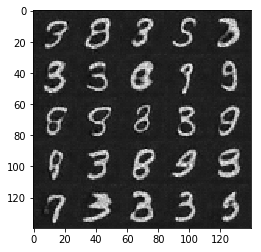

Epoch 2/2... Discriminator loss: 0.3335 Generator loss: 2.1674
Epoch 2/2... Discriminator loss: 0.2314 Generator loss: 3.3883
Epoch 2/2... Discriminator loss: 0.5047 Generator loss: 1.9199
Epoch 2/2... Discriminator loss: 0.3176 Generator loss: 2.1617
Epoch 2/2... Discriminator loss: 0.2550 Generator loss: 2.4420
Epoch 2/2... Discriminator loss: 0.2050 Generator loss: 2.7029
Epoch 2/2... Discriminator loss: 0.9825 Generator loss: 1.0362
Epoch 2/2... Discriminator loss: 0.8622 Generator loss: 0.7716
Epoch 2/2... Discriminator loss: 0.3972 Generator loss: 1.5214
Epoch 2/2... Discriminator loss: 0.3621 Generator loss: 2.4290


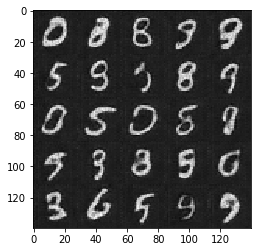

Epoch 2/2... Discriminator loss: 0.4217 Generator loss: 1.9347
Epoch 2/2... Discriminator loss: 0.8813 Generator loss: 1.0267
Epoch 2/2... Discriminator loss: 0.3780 Generator loss: 2.5887
Epoch 2/2... Discriminator loss: 0.3380 Generator loss: 1.8714
Epoch 2/2... Discriminator loss: 0.5670 Generator loss: 1.6106
Epoch 2/2... Discriminator loss: 0.3670 Generator loss: 1.8975
Epoch 2/2... Discriminator loss: 0.4421 Generator loss: 1.6780
Epoch 2/2... Discriminator loss: 0.7732 Generator loss: 0.8001
Epoch 2/2... Discriminator loss: 0.6616 Generator loss: 1.1366
Epoch 2/2... Discriminator loss: 0.4127 Generator loss: 1.9413


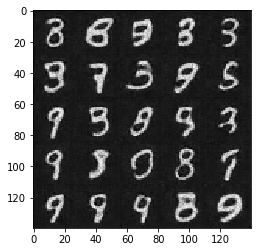

Epoch 2/2... Discriminator loss: 0.2387 Generator loss: 3.4157
Epoch 2/2... Discriminator loss: 0.3647 Generator loss: 2.7686
Epoch 2/2... Discriminator loss: 0.7149 Generator loss: 0.9521
Epoch 2/2... Discriminator loss: 0.7913 Generator loss: 1.5559
Epoch 2/2... Discriminator loss: 0.4550 Generator loss: 1.5176
Epoch 2/2... Discriminator loss: 0.5393 Generator loss: 2.0480
Epoch 2/2... Discriminator loss: 1.2831 Generator loss: 0.2989
Epoch 2/2... Discriminator loss: 0.7401 Generator loss: 1.0978
Epoch 2/2... Discriminator loss: 0.2196 Generator loss: 2.8587
Epoch 2/2... Discriminator loss: 0.7613 Generator loss: 4.0894


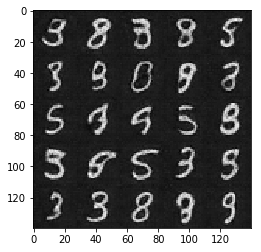

Epoch 2/2... Discriminator loss: 0.7533 Generator loss: 1.0779
Epoch 2/2... Discriminator loss: 0.6905 Generator loss: 1.8465
Epoch 2/2... Discriminator loss: 0.3759 Generator loss: 2.0007
Epoch 2/2... Discriminator loss: 0.3179 Generator loss: 2.4337
Epoch 2/2... Discriminator loss: 0.3227 Generator loss: 2.5084
Epoch 2/2... Discriminator loss: 0.2441 Generator loss: 2.8147
Epoch 2/2... Discriminator loss: 0.6838 Generator loss: 0.9716
Epoch 2/2... Discriminator loss: 0.5078 Generator loss: 1.3988
Epoch 2/2... Discriminator loss: 0.4489 Generator loss: 2.8101
Epoch 2/2... Discriminator loss: 0.3736 Generator loss: 3.2289


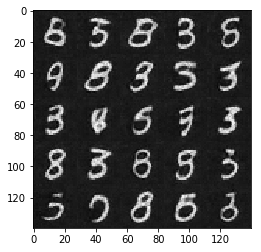

Epoch 2/2... Discriminator loss: 0.6649 Generator loss: 1.1978
Epoch 2/2... Discriminator loss: 0.3951 Generator loss: 2.1821
Epoch 2/2... Discriminator loss: 0.4163 Generator loss: 1.7084
Epoch 2/2... Discriminator loss: 0.2844 Generator loss: 3.2867
Epoch 2/2... Discriminator loss: 0.7181 Generator loss: 0.8591
Epoch 2/2... Discriminator loss: 0.5515 Generator loss: 2.7300
Epoch 2/2... Discriminator loss: 0.6331 Generator loss: 3.3526
Epoch 2/2... Discriminator loss: 0.3808 Generator loss: 3.7927
Epoch 2/2... Discriminator loss: 0.4502 Generator loss: 1.6580
Epoch 2/2... Discriminator loss: 0.6535 Generator loss: 1.2053


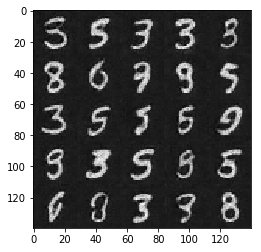

Epoch 2/2... Discriminator loss: 0.3335 Generator loss: 2.1799
Epoch 2/2... Discriminator loss: 0.4362 Generator loss: 2.0759
Epoch 2/2... Discriminator loss: 0.3206 Generator loss: 1.9849
Epoch 2/2... Discriminator loss: 0.3704 Generator loss: 1.9800
Epoch 2/2... Discriminator loss: 0.5551 Generator loss: 1.2043
Epoch 2/2... Discriminator loss: 0.5539 Generator loss: 1.5796
Epoch 2/2... Discriminator loss: 0.5070 Generator loss: 1.6035
Epoch 2/2... Discriminator loss: 0.7321 Generator loss: 1.0188
Epoch 2/2... Discriminator loss: 0.3688 Generator loss: 2.8849
Epoch 2/2... Discriminator loss: 1.1763 Generator loss: 0.5684


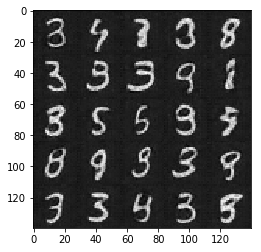

Epoch 2/2... Discriminator loss: 0.5981 Generator loss: 1.2798
Epoch 2/2... Discriminator loss: 0.4043 Generator loss: 1.4704
Epoch 2/2... Discriminator loss: 0.5114 Generator loss: 1.5587
Epoch 2/2... Discriminator loss: 0.2300 Generator loss: 2.0952
Epoch 2/2... Discriminator loss: 0.4507 Generator loss: 3.5664
Epoch 2/2... Discriminator loss: 0.3735 Generator loss: 3.0598
Epoch 2/2... Discriminator loss: 0.7568 Generator loss: 0.9731
Epoch 2/2... Discriminator loss: 0.3603 Generator loss: 1.8936
Epoch 2/2... Discriminator loss: 0.3695 Generator loss: 1.7352
Epoch 2/2... Discriminator loss: 0.5346 Generator loss: 1.3427


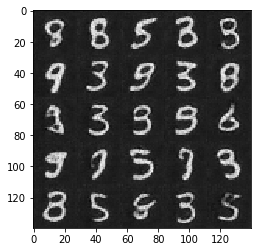

Epoch 2/2... Discriminator loss: 0.4279 Generator loss: 2.1615
Epoch 2/2... Discriminator loss: 0.3153 Generator loss: 2.9962
Epoch 2/2... Discriminator loss: 0.2675 Generator loss: 2.4961
Epoch 2/2... Discriminator loss: 0.4983 Generator loss: 3.5599
Epoch 2/2... Discriminator loss: 1.7488 Generator loss: 0.2945
Epoch 2/2... Discriminator loss: 0.8134 Generator loss: 1.0208
Epoch 2/2... Discriminator loss: 0.4856 Generator loss: 2.1175
Epoch 2/2... Discriminator loss: 1.2215 Generator loss: 0.6301
Epoch 2/2... Discriminator loss: 0.2056 Generator loss: 3.3060
Epoch 2/2... Discriminator loss: 0.6890 Generator loss: 0.9984


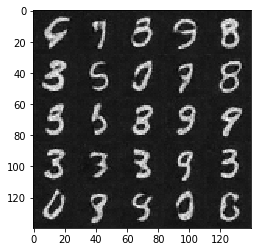

Epoch 2/2... Discriminator loss: 0.6652 Generator loss: 1.0282
Epoch 2/2... Discriminator loss: 0.2280 Generator loss: 2.5112
Epoch 2/2... Discriminator loss: 0.3619 Generator loss: 2.9216
Epoch 2/2... Discriminator loss: 0.7159 Generator loss: 1.3162
Epoch 2/2... Discriminator loss: 0.3146 Generator loss: 4.2401
Epoch 2/2... Discriminator loss: 0.4237 Generator loss: 2.3674
Epoch 2/2... Discriminator loss: 0.5698 Generator loss: 1.4525
Epoch 2/2... Discriminator loss: 0.4072 Generator loss: 2.6652
Epoch 2/2... Discriminator loss: 0.2939 Generator loss: 3.1765
Epoch 2/2... Discriminator loss: 0.4078 Generator loss: 2.1238


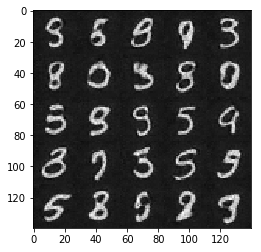

Epoch 2/2... Discriminator loss: 0.4633 Generator loss: 3.2993
Epoch 2/2... Discriminator loss: 0.4189 Generator loss: 1.5416
Epoch 2/2... Discriminator loss: 0.4557 Generator loss: 1.8015
Epoch 2/2... Discriminator loss: 0.6048 Generator loss: 1.1977
Epoch 2/2... Discriminator loss: 0.4407 Generator loss: 3.6478
Epoch 2/2... Discriminator loss: 0.1123 Generator loss: 4.3371
Epoch 2/2... Discriminator loss: 0.3979 Generator loss: 2.2883
Epoch 2/2... Discriminator loss: 0.3517 Generator loss: 2.0973
Epoch 2/2... Discriminator loss: 0.8599 Generator loss: 1.1815
Epoch 2/2... Discriminator loss: 0.5176 Generator loss: 1.6896


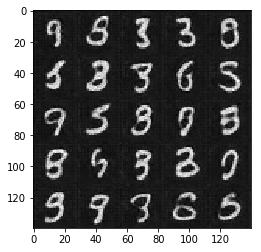

Epoch 2/2... Discriminator loss: 0.3916 Generator loss: 3.6754
Epoch 2/2... Discriminator loss: 0.4085 Generator loss: 1.6579
Epoch 2/2... Discriminator loss: 0.4292 Generator loss: 1.5742
Epoch 2/2... Discriminator loss: 1.0693 Generator loss: 0.6321
Epoch 2/2... Discriminator loss: 0.3735 Generator loss: 2.7796
Epoch 2/2... Discriminator loss: 0.2706 Generator loss: 2.9163
Epoch 2/2... Discriminator loss: 0.3629 Generator loss: 5.3868
Epoch 2/2... Discriminator loss: 0.3759 Generator loss: 3.1026
Epoch 2/2... Discriminator loss: 0.4466 Generator loss: 1.6853
Epoch 2/2... Discriminator loss: 1.0551 Generator loss: 0.8200


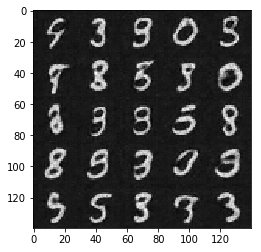

Epoch 2/2... Discriminator loss: 0.2566 Generator loss: 2.2951
Epoch 2/2... Discriminator loss: 0.2222 Generator loss: 2.2436
Epoch 2/2... Discriminator loss: 0.6263 Generator loss: 1.5804
Epoch 2/2... Discriminator loss: 0.2411 Generator loss: 3.8632
Epoch 2/2... Discriminator loss: 0.3760 Generator loss: 1.7073
Epoch 2/2... Discriminator loss: 1.1795 Generator loss: 6.3260
Epoch 2/2... Discriminator loss: 0.4456 Generator loss: 1.7626
Epoch 2/2... Discriminator loss: 0.5135 Generator loss: 1.5897
Epoch 2/2... Discriminator loss: 0.3642 Generator loss: 3.1186
Epoch 2/2... Discriminator loss: 0.4382 Generator loss: 2.0604


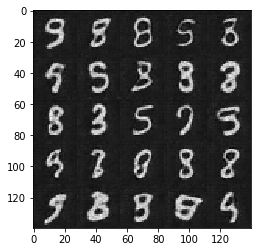

Epoch 2/2... Discriminator loss: 0.3150 Generator loss: 2.8789
Epoch 2/2... Discriminator loss: 0.1914 Generator loss: 4.6089
Epoch 2/2... Discriminator loss: 0.3466 Generator loss: 2.3084
Epoch 2/2... Discriminator loss: 0.6254 Generator loss: 3.0791
Epoch 2/2... Discriminator loss: 0.5473 Generator loss: 1.7068
Epoch 2/2... Discriminator loss: 0.3695 Generator loss: 4.0920
Epoch 2/2... Discriminator loss: 0.2566 Generator loss: 2.9156
Epoch 2/2... Discriminator loss: 1.0231 Generator loss: 0.7344
Epoch 2/2... Discriminator loss: 0.4518 Generator loss: 1.8740
Epoch 2/2... Discriminator loss: 0.3348 Generator loss: 1.9669


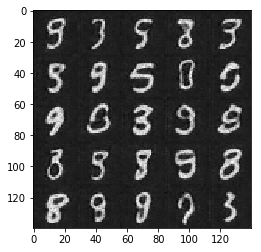

Epoch 2/2... Discriminator loss: 0.5470 Generator loss: 1.7559
Epoch 2/2... Discriminator loss: 0.5183 Generator loss: 1.5175
Epoch 2/2... Discriminator loss: 0.3576 Generator loss: 2.5186
Epoch 2/2... Discriminator loss: 0.4690 Generator loss: 3.8125
Epoch 2/2... Discriminator loss: 0.4216 Generator loss: 1.8031
Epoch 2/2... Discriminator loss: 0.4450 Generator loss: 1.4508
Epoch 2/2... Discriminator loss: 1.1373 Generator loss: 0.4432
Epoch 2/2... Discriminator loss: 0.2268 Generator loss: 3.1392
Epoch 2/2... Discriminator loss: 0.8021 Generator loss: 0.9593
Epoch 2/2... Discriminator loss: 0.3494 Generator loss: 1.8084


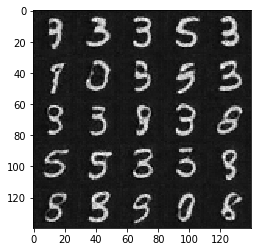

Epoch 2/2... Discriminator loss: 0.2434 Generator loss: 3.7104
Epoch 2/2... Discriminator loss: 0.5968 Generator loss: 3.2278
Epoch 2/2... Discriminator loss: 0.8754 Generator loss: 1.1735
Epoch 2/2... Discriminator loss: 0.2216 Generator loss: 3.2566
Epoch 2/2... Discriminator loss: 0.7023 Generator loss: 1.2230
Epoch 2/2... Discriminator loss: 0.1398 Generator loss: 3.1450
Epoch 2/2... Discriminator loss: 0.4530 Generator loss: 1.9532
Epoch 2/2... Discriminator loss: 0.6643 Generator loss: 1.4751
Epoch 2/2... Discriminator loss: 0.4479 Generator loss: 2.3757
Epoch 2/2... Discriminator loss: 0.5309 Generator loss: 1.7215


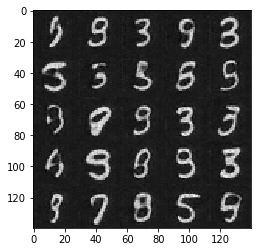

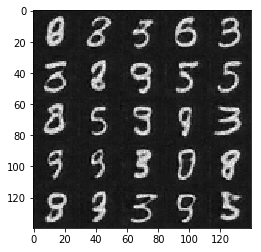

Total execution time...35.28112560908


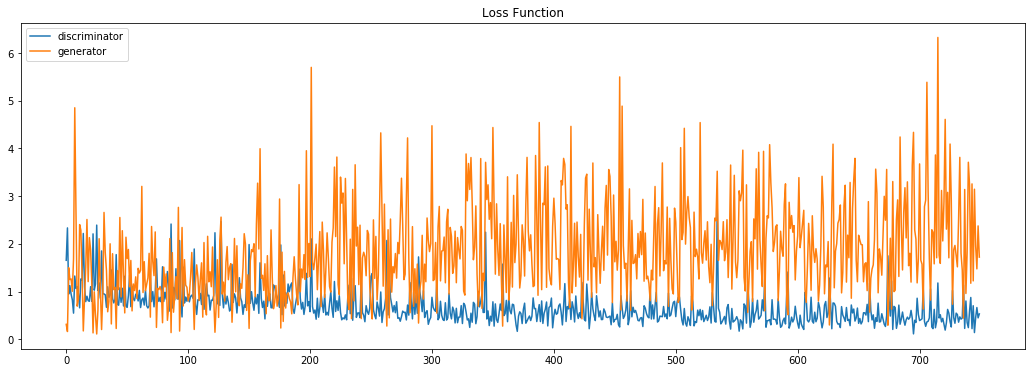

In [12]:
batch_size = 16
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

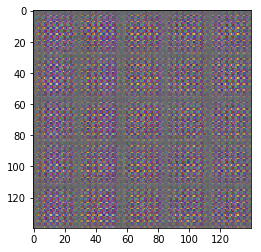

Epoch 1/1... Discriminator loss: 0.7290 Generator loss: 1.3079
Epoch 1/1... Discriminator loss: 0.6801 Generator loss: 3.2123
Epoch 1/1... Discriminator loss: 0.9153 Generator loss: 2.0951
Epoch 1/1... Discriminator loss: 0.7714 Generator loss: 2.3796
Epoch 1/1... Discriminator loss: 0.4728 Generator loss: 2.0432
Epoch 1/1... Discriminator loss: 0.9296 Generator loss: 1.3909
Epoch 1/1... Discriminator loss: 0.3195 Generator loss: 2.1195
Epoch 1/1... Discriminator loss: 0.8005 Generator loss: 1.6337
Epoch 1/1... Discriminator loss: 0.6278 Generator loss: 1.4550
Epoch 1/1... Discriminator loss: 1.2578 Generator loss: 1.3036


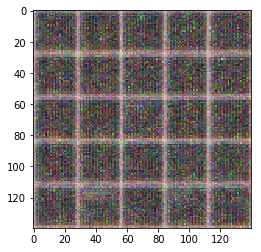

Epoch 1/1... Discriminator loss: 2.5422 Generator loss: 4.7019
Epoch 1/1... Discriminator loss: 1.2864 Generator loss: 1.0261
Epoch 1/1... Discriminator loss: 0.9874 Generator loss: 0.8967
Epoch 1/1... Discriminator loss: 1.1828 Generator loss: 2.4486
Epoch 1/1... Discriminator loss: 1.0668 Generator loss: 0.7695
Epoch 1/1... Discriminator loss: 1.2563 Generator loss: 1.1380
Epoch 1/1... Discriminator loss: 0.9973 Generator loss: 1.4743
Epoch 1/1... Discriminator loss: 0.8511 Generator loss: 1.3570
Epoch 1/1... Discriminator loss: 1.3266 Generator loss: 1.0113
Epoch 1/1... Discriminator loss: 1.3209 Generator loss: 1.0490


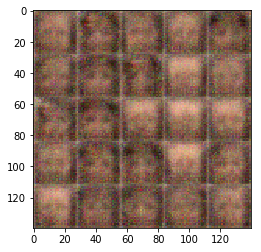

Epoch 1/1... Discriminator loss: 0.9922 Generator loss: 1.4528
Epoch 1/1... Discriminator loss: 1.0345 Generator loss: 1.4194
Epoch 1/1... Discriminator loss: 1.1940 Generator loss: 1.3270
Epoch 1/1... Discriminator loss: 1.0483 Generator loss: 0.9384
Epoch 1/1... Discriminator loss: 1.1281 Generator loss: 1.3526
Epoch 1/1... Discriminator loss: 1.1996 Generator loss: 1.0991
Epoch 1/1... Discriminator loss: 1.1336 Generator loss: 1.4514
Epoch 1/1... Discriminator loss: 0.8956 Generator loss: 0.9338
Epoch 1/1... Discriminator loss: 1.5850 Generator loss: 0.3616
Epoch 1/1... Discriminator loss: 1.1296 Generator loss: 1.2161


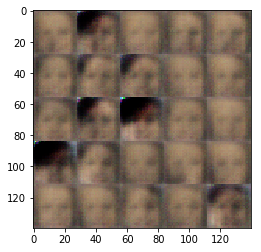

Epoch 1/1... Discriminator loss: 1.1592 Generator loss: 1.0530
Epoch 1/1... Discriminator loss: 1.0228 Generator loss: 0.9289
Epoch 1/1... Discriminator loss: 1.5108 Generator loss: 1.9124
Epoch 1/1... Discriminator loss: 1.1903 Generator loss: 0.8693
Epoch 1/1... Discriminator loss: 1.1511 Generator loss: 0.6242
Epoch 1/1... Discriminator loss: 1.2076 Generator loss: 0.7959
Epoch 1/1... Discriminator loss: 1.3037 Generator loss: 0.6335
Epoch 1/1... Discriminator loss: 1.0799 Generator loss: 0.8855
Epoch 1/1... Discriminator loss: 1.2045 Generator loss: 1.9451
Epoch 1/1... Discriminator loss: 0.8969 Generator loss: 1.3487


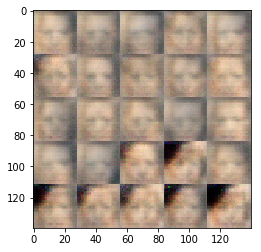

Epoch 1/1... Discriminator loss: 1.0401 Generator loss: 0.8668
Epoch 1/1... Discriminator loss: 1.0434 Generator loss: 0.9600
Epoch 1/1... Discriminator loss: 1.4584 Generator loss: 0.4804
Epoch 1/1... Discriminator loss: 0.8909 Generator loss: 1.7392
Epoch 1/1... Discriminator loss: 1.3004 Generator loss: 0.8598
Epoch 1/1... Discriminator loss: 0.9595 Generator loss: 1.1701
Epoch 1/1... Discriminator loss: 1.0154 Generator loss: 0.9416
Epoch 1/1... Discriminator loss: 1.0898 Generator loss: 1.7097
Epoch 1/1... Discriminator loss: 0.8371 Generator loss: 1.2134
Epoch 1/1... Discriminator loss: 1.1652 Generator loss: 1.2681


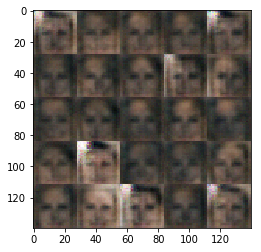

Epoch 1/1... Discriminator loss: 0.9260 Generator loss: 1.4075
Epoch 1/1... Discriminator loss: 0.8269 Generator loss: 1.1113
Epoch 1/1... Discriminator loss: 0.8207 Generator loss: 1.1267
Epoch 1/1... Discriminator loss: 1.4015 Generator loss: 1.2102
Epoch 1/1... Discriminator loss: 0.8899 Generator loss: 1.6038
Epoch 1/1... Discriminator loss: 0.9508 Generator loss: 1.1855
Epoch 1/1... Discriminator loss: 1.0144 Generator loss: 1.7156
Epoch 1/1... Discriminator loss: 1.0744 Generator loss: 1.0029
Epoch 1/1... Discriminator loss: 1.1251 Generator loss: 1.1711
Epoch 1/1... Discriminator loss: 1.0736 Generator loss: 1.1652


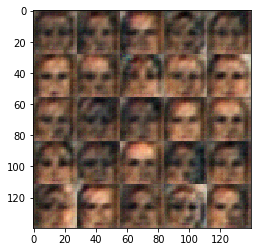

Epoch 1/1... Discriminator loss: 0.9699 Generator loss: 1.7594
Epoch 1/1... Discriminator loss: 0.9581 Generator loss: 1.3986
Epoch 1/1... Discriminator loss: 0.7462 Generator loss: 1.2101
Epoch 1/1... Discriminator loss: 1.0167 Generator loss: 1.2434
Epoch 1/1... Discriminator loss: 1.3529 Generator loss: 0.7444
Epoch 1/1... Discriminator loss: 1.0215 Generator loss: 1.1175
Epoch 1/1... Discriminator loss: 1.1727 Generator loss: 1.1624
Epoch 1/1... Discriminator loss: 1.0068 Generator loss: 1.2714
Epoch 1/1... Discriminator loss: 1.2844 Generator loss: 1.0229
Epoch 1/1... Discriminator loss: 1.1509 Generator loss: 1.3409


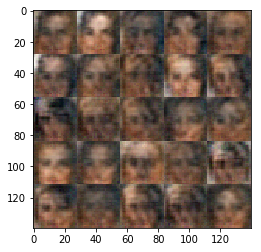

Epoch 1/1... Discriminator loss: 1.0662 Generator loss: 1.2692
Epoch 1/1... Discriminator loss: 1.2872 Generator loss: 1.3979
Epoch 1/1... Discriminator loss: 1.2211 Generator loss: 1.4100
Epoch 1/1... Discriminator loss: 0.9223 Generator loss: 1.0895
Epoch 1/1... Discriminator loss: 1.5224 Generator loss: 0.6390
Epoch 1/1... Discriminator loss: 0.9664 Generator loss: 1.2547
Epoch 1/1... Discriminator loss: 1.0769 Generator loss: 1.1597
Epoch 1/1... Discriminator loss: 1.4430 Generator loss: 1.0209
Epoch 1/1... Discriminator loss: 1.1547 Generator loss: 1.0307
Epoch 1/1... Discriminator loss: 1.2494 Generator loss: 1.3806


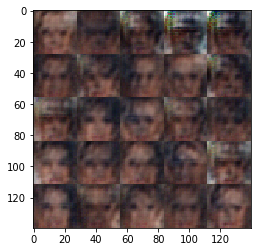

Epoch 1/1... Discriminator loss: 0.9721 Generator loss: 1.1814
Epoch 1/1... Discriminator loss: 1.1680 Generator loss: 1.1425
Epoch 1/1... Discriminator loss: 1.1405 Generator loss: 1.0465
Epoch 1/1... Discriminator loss: 1.4065 Generator loss: 1.2054
Epoch 1/1... Discriminator loss: 1.3242 Generator loss: 0.9442
Epoch 1/1... Discriminator loss: 1.2231 Generator loss: 1.0665
Epoch 1/1... Discriminator loss: 1.4226 Generator loss: 0.8500
Epoch 1/1... Discriminator loss: 1.0267 Generator loss: 0.8575
Epoch 1/1... Discriminator loss: 1.2021 Generator loss: 1.3361
Epoch 1/1... Discriminator loss: 1.1042 Generator loss: 1.2724


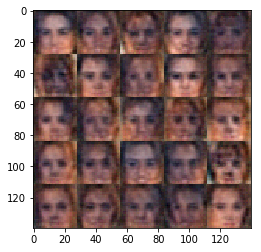

Epoch 1/1... Discriminator loss: 1.0617 Generator loss: 1.2497
Epoch 1/1... Discriminator loss: 1.2264 Generator loss: 0.8622
Epoch 1/1... Discriminator loss: 1.0122 Generator loss: 1.0880
Epoch 1/1... Discriminator loss: 1.2746 Generator loss: 0.8221
Epoch 1/1... Discriminator loss: 0.9997 Generator loss: 1.1602
Epoch 1/1... Discriminator loss: 1.3265 Generator loss: 0.8154
Epoch 1/1... Discriminator loss: 1.3126 Generator loss: 0.9456
Epoch 1/1... Discriminator loss: 1.2119 Generator loss: 1.0113
Epoch 1/1... Discriminator loss: 1.1150 Generator loss: 1.0246
Epoch 1/1... Discriminator loss: 1.0859 Generator loss: 1.0743


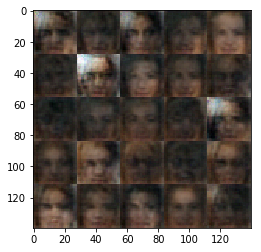

Epoch 1/1... Discriminator loss: 1.3614 Generator loss: 0.9523
Epoch 1/1... Discriminator loss: 1.1881 Generator loss: 1.1880
Epoch 1/1... Discriminator loss: 1.1952 Generator loss: 1.0909
Epoch 1/1... Discriminator loss: 1.1198 Generator loss: 0.9966
Epoch 1/1... Discriminator loss: 1.2260 Generator loss: 1.0887
Epoch 1/1... Discriminator loss: 1.0939 Generator loss: 1.1025
Epoch 1/1... Discriminator loss: 1.1847 Generator loss: 0.9240
Epoch 1/1... Discriminator loss: 1.2193 Generator loss: 1.1303
Epoch 1/1... Discriminator loss: 1.1647 Generator loss: 1.3942
Epoch 1/1... Discriminator loss: 1.1601 Generator loss: 1.2128


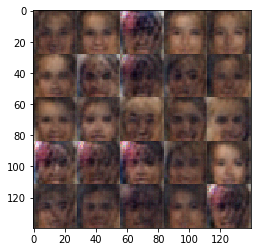

Epoch 1/1... Discriminator loss: 1.1938 Generator loss: 1.0036
Epoch 1/1... Discriminator loss: 1.2362 Generator loss: 1.2829
Epoch 1/1... Discriminator loss: 1.1842 Generator loss: 1.0746
Epoch 1/1... Discriminator loss: 1.1871 Generator loss: 0.8686
Epoch 1/1... Discriminator loss: 1.2847 Generator loss: 1.0872
Epoch 1/1... Discriminator loss: 1.2235 Generator loss: 1.1687
Epoch 1/1... Discriminator loss: 1.3612 Generator loss: 0.6989
Epoch 1/1... Discriminator loss: 1.1413 Generator loss: 0.9426
Epoch 1/1... Discriminator loss: 1.2554 Generator loss: 1.2784
Epoch 1/1... Discriminator loss: 1.1846 Generator loss: 1.0019


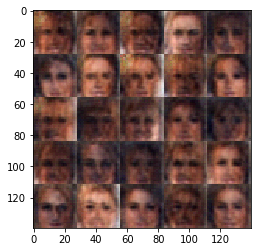

Epoch 1/1... Discriminator loss: 1.3363 Generator loss: 0.8672
Epoch 1/1... Discriminator loss: 1.2374 Generator loss: 1.1425
Epoch 1/1... Discriminator loss: 1.0618 Generator loss: 1.0174
Epoch 1/1... Discriminator loss: 1.3236 Generator loss: 0.9124
Epoch 1/1... Discriminator loss: 1.1985 Generator loss: 1.0215
Epoch 1/1... Discriminator loss: 1.2704 Generator loss: 0.8659
Epoch 1/1... Discriminator loss: 1.2696 Generator loss: 0.8737
Epoch 1/1... Discriminator loss: 1.3575 Generator loss: 0.5969
Epoch 1/1... Discriminator loss: 1.2995 Generator loss: 0.9466
Epoch 1/1... Discriminator loss: 1.0744 Generator loss: 0.8597


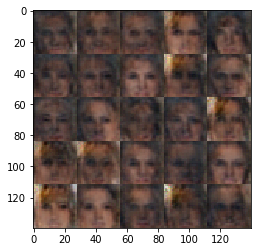

Epoch 1/1... Discriminator loss: 1.3611 Generator loss: 1.2000
Epoch 1/1... Discriminator loss: 1.1508 Generator loss: 1.0235
Epoch 1/1... Discriminator loss: 1.3222 Generator loss: 1.5064
Epoch 1/1... Discriminator loss: 1.1667 Generator loss: 1.1133
Epoch 1/1... Discriminator loss: 1.2862 Generator loss: 1.3191
Epoch 1/1... Discriminator loss: 1.3367 Generator loss: 0.9332
Epoch 1/1... Discriminator loss: 1.1508 Generator loss: 0.9836
Epoch 1/1... Discriminator loss: 1.0789 Generator loss: 0.9212
Epoch 1/1... Discriminator loss: 1.2588 Generator loss: 1.0179
Epoch 1/1... Discriminator loss: 1.1427 Generator loss: 1.0888


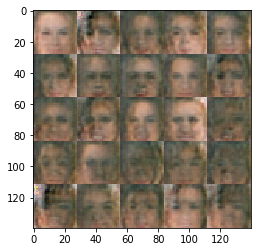

Epoch 1/1... Discriminator loss: 1.2506 Generator loss: 0.8567
Epoch 1/1... Discriminator loss: 1.1539 Generator loss: 1.0726
Epoch 1/1... Discriminator loss: 1.1261 Generator loss: 1.0201
Epoch 1/1... Discriminator loss: 1.3881 Generator loss: 1.2106
Epoch 1/1... Discriminator loss: 1.2890 Generator loss: 0.9371
Epoch 1/1... Discriminator loss: 1.2717 Generator loss: 1.1468
Epoch 1/1... Discriminator loss: 1.3051 Generator loss: 1.1026
Epoch 1/1... Discriminator loss: 1.2778 Generator loss: 0.8674
Epoch 1/1... Discriminator loss: 1.1738 Generator loss: 1.3863
Epoch 1/1... Discriminator loss: 1.0690 Generator loss: 1.1635


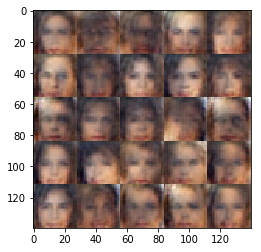

Epoch 1/1... Discriminator loss: 1.2618 Generator loss: 1.0763
Epoch 1/1... Discriminator loss: 1.1956 Generator loss: 1.1365
Epoch 1/1... Discriminator loss: 1.1213 Generator loss: 1.0545
Epoch 1/1... Discriminator loss: 1.2601 Generator loss: 0.8441
Epoch 1/1... Discriminator loss: 1.2565 Generator loss: 0.8394
Epoch 1/1... Discriminator loss: 1.2297 Generator loss: 1.7320
Epoch 1/1... Discriminator loss: 1.2415 Generator loss: 0.9971
Epoch 1/1... Discriminator loss: 1.1462 Generator loss: 0.8333
Epoch 1/1... Discriminator loss: 1.2763 Generator loss: 0.8947
Epoch 1/1... Discriminator loss: 1.2266 Generator loss: 0.8817


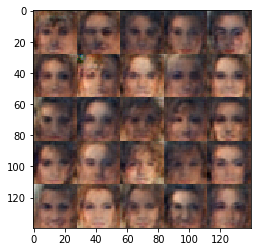

Epoch 1/1... Discriminator loss: 1.2248 Generator loss: 0.9304
Epoch 1/1... Discriminator loss: 1.2026 Generator loss: 1.0491
Epoch 1/1... Discriminator loss: 1.1854 Generator loss: 1.3149
Epoch 1/1... Discriminator loss: 1.1243 Generator loss: 0.9161
Epoch 1/1... Discriminator loss: 1.5031 Generator loss: 1.6136
Epoch 1/1... Discriminator loss: 1.3456 Generator loss: 0.8733
Epoch 1/1... Discriminator loss: 1.2375 Generator loss: 0.9464
Epoch 1/1... Discriminator loss: 1.1492 Generator loss: 1.1448
Epoch 1/1... Discriminator loss: 1.1604 Generator loss: 0.8581
Epoch 1/1... Discriminator loss: 1.2758 Generator loss: 0.7892


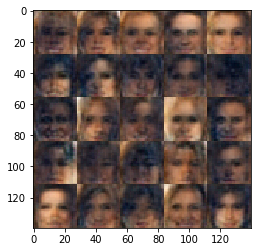

Epoch 1/1... Discriminator loss: 1.2936 Generator loss: 0.9992
Epoch 1/1... Discriminator loss: 1.2670 Generator loss: 1.1509
Epoch 1/1... Discriminator loss: 1.3639 Generator loss: 1.2573
Epoch 1/1... Discriminator loss: 1.2994 Generator loss: 0.8467
Epoch 1/1... Discriminator loss: 1.3212 Generator loss: 0.8098
Epoch 1/1... Discriminator loss: 1.1218 Generator loss: 1.0515
Epoch 1/1... Discriminator loss: 1.1422 Generator loss: 0.8001
Epoch 1/1... Discriminator loss: 1.2367 Generator loss: 0.9209
Epoch 1/1... Discriminator loss: 1.3523 Generator loss: 0.8180
Epoch 1/1... Discriminator loss: 1.1807 Generator loss: 1.0451


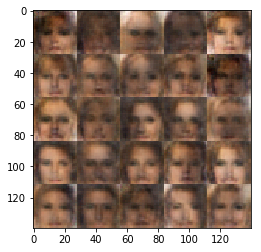

Epoch 1/1... Discriminator loss: 1.2031 Generator loss: 1.0228
Epoch 1/1... Discriminator loss: 1.3629 Generator loss: 1.0050
Epoch 1/1... Discriminator loss: 1.2741 Generator loss: 0.8019
Epoch 1/1... Discriminator loss: 1.2276 Generator loss: 0.7499
Epoch 1/1... Discriminator loss: 1.2398 Generator loss: 0.7978
Epoch 1/1... Discriminator loss: 1.2306 Generator loss: 0.7694
Epoch 1/1... Discriminator loss: 1.3409 Generator loss: 0.9805
Epoch 1/1... Discriminator loss: 1.2917 Generator loss: 0.8679
Epoch 1/1... Discriminator loss: 1.4637 Generator loss: 0.8397
Epoch 1/1... Discriminator loss: 1.2874 Generator loss: 0.6853


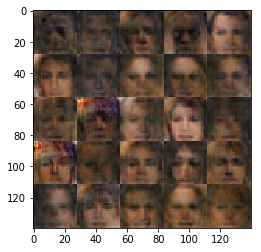

Epoch 1/1... Discriminator loss: 1.0578 Generator loss: 1.0834
Epoch 1/1... Discriminator loss: 1.2085 Generator loss: 1.0388
Epoch 1/1... Discriminator loss: 1.2008 Generator loss: 0.8522
Epoch 1/1... Discriminator loss: 1.3408 Generator loss: 1.4872
Epoch 1/1... Discriminator loss: 1.1441 Generator loss: 0.9481
Epoch 1/1... Discriminator loss: 1.3658 Generator loss: 1.3009
Epoch 1/1... Discriminator loss: 1.2364 Generator loss: 0.7224
Epoch 1/1... Discriminator loss: 1.4448 Generator loss: 0.6937
Epoch 1/1... Discriminator loss: 1.2256 Generator loss: 0.9723
Epoch 1/1... Discriminator loss: 1.2343 Generator loss: 1.3876


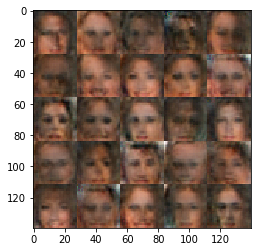

Epoch 1/1... Discriminator loss: 1.1677 Generator loss: 0.8410
Epoch 1/1... Discriminator loss: 1.2280 Generator loss: 1.2592
Epoch 1/1... Discriminator loss: 1.2705 Generator loss: 0.8332
Epoch 1/1... Discriminator loss: 1.3479 Generator loss: 0.9180
Epoch 1/1... Discriminator loss: 1.2602 Generator loss: 0.8106
Epoch 1/1... Discriminator loss: 1.2331 Generator loss: 0.9941
Epoch 1/1... Discriminator loss: 1.1530 Generator loss: 0.9679
Epoch 1/1... Discriminator loss: 1.2298 Generator loss: 0.8998
Epoch 1/1... Discriminator loss: 1.3223 Generator loss: 0.9093
Epoch 1/1... Discriminator loss: 1.2649 Generator loss: 1.1035


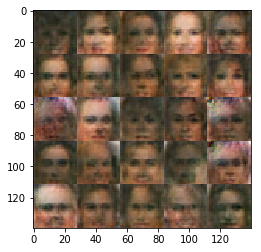

Epoch 1/1... Discriminator loss: 1.4146 Generator loss: 0.7914
Epoch 1/1... Discriminator loss: 1.1299 Generator loss: 1.3947
Epoch 1/1... Discriminator loss: 1.3308 Generator loss: 0.7675
Epoch 1/1... Discriminator loss: 1.3044 Generator loss: 0.9153
Epoch 1/1... Discriminator loss: 1.2687 Generator loss: 0.9846
Epoch 1/1... Discriminator loss: 1.2162 Generator loss: 0.9322
Epoch 1/1... Discriminator loss: 1.3821 Generator loss: 1.1766
Epoch 1/1... Discriminator loss: 1.2868 Generator loss: 0.7097
Epoch 1/1... Discriminator loss: 1.2393 Generator loss: 0.8857
Epoch 1/1... Discriminator loss: 1.4836 Generator loss: 0.8075


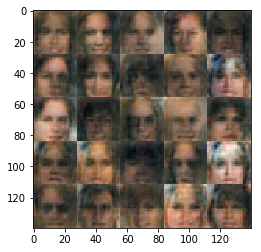

Epoch 1/1... Discriminator loss: 1.1818 Generator loss: 1.0256
Epoch 1/1... Discriminator loss: 1.3366 Generator loss: 0.9246
Epoch 1/1... Discriminator loss: 1.1566 Generator loss: 0.7574
Epoch 1/1... Discriminator loss: 1.1907 Generator loss: 1.0414
Epoch 1/1... Discriminator loss: 1.1992 Generator loss: 0.9254
Epoch 1/1... Discriminator loss: 1.2640 Generator loss: 0.6894
Epoch 1/1... Discriminator loss: 1.2284 Generator loss: 0.9163
Epoch 1/1... Discriminator loss: 1.2819 Generator loss: 0.7318
Epoch 1/1... Discriminator loss: 1.2586 Generator loss: 0.8286
Epoch 1/1... Discriminator loss: 1.2305 Generator loss: 1.0129


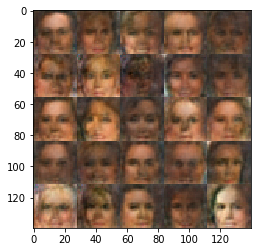

Epoch 1/1... Discriminator loss: 1.1716 Generator loss: 0.9378
Epoch 1/1... Discriminator loss: 1.2069 Generator loss: 0.8261
Epoch 1/1... Discriminator loss: 1.2009 Generator loss: 0.7472
Epoch 1/1... Discriminator loss: 1.2098 Generator loss: 0.8226
Epoch 1/1... Discriminator loss: 1.3105 Generator loss: 0.7191
Epoch 1/1... Discriminator loss: 1.2285 Generator loss: 0.7960
Epoch 1/1... Discriminator loss: 1.2565 Generator loss: 0.8666
Epoch 1/1... Discriminator loss: 1.2542 Generator loss: 0.8498
Epoch 1/1... Discriminator loss: 1.2947 Generator loss: 0.8474
Epoch 1/1... Discriminator loss: 1.1850 Generator loss: 0.7829


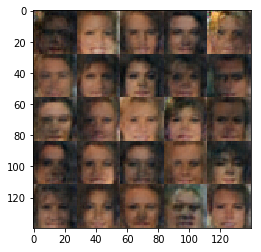

Epoch 1/1... Discriminator loss: 1.2344 Generator loss: 0.8388
Epoch 1/1... Discriminator loss: 1.2092 Generator loss: 0.9314
Epoch 1/1... Discriminator loss: 1.3273 Generator loss: 0.8528
Epoch 1/1... Discriminator loss: 1.2964 Generator loss: 1.0019
Epoch 1/1... Discriminator loss: 1.2579 Generator loss: 0.8456
Epoch 1/1... Discriminator loss: 1.1491 Generator loss: 0.9215
Epoch 1/1... Discriminator loss: 1.1266 Generator loss: 0.8127
Epoch 1/1... Discriminator loss: 1.3398 Generator loss: 0.7595
Epoch 1/1... Discriminator loss: 1.3158 Generator loss: 0.7441
Epoch 1/1... Discriminator loss: 1.2750 Generator loss: 0.9299


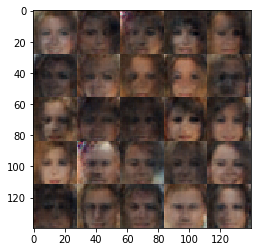

Epoch 1/1... Discriminator loss: 1.3640 Generator loss: 0.8456
Epoch 1/1... Discriminator loss: 1.2121 Generator loss: 0.9627
Epoch 1/1... Discriminator loss: 1.2247 Generator loss: 0.8663
Epoch 1/1... Discriminator loss: 1.2875 Generator loss: 0.7370
Epoch 1/1... Discriminator loss: 1.2068 Generator loss: 1.1835
Epoch 1/1... Discriminator loss: 1.2824 Generator loss: 0.8288
Epoch 1/1... Discriminator loss: 1.3940 Generator loss: 0.9787
Epoch 1/1... Discriminator loss: 1.1147 Generator loss: 0.9562
Epoch 1/1... Discriminator loss: 1.1743 Generator loss: 0.8087
Epoch 1/1... Discriminator loss: 1.2524 Generator loss: 0.7776


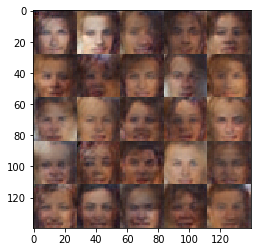

Epoch 1/1... Discriminator loss: 1.2480 Generator loss: 0.7960
Epoch 1/1... Discriminator loss: 1.3613 Generator loss: 0.7828
Epoch 1/1... Discriminator loss: 1.2913 Generator loss: 0.7128
Epoch 1/1... Discriminator loss: 1.2264 Generator loss: 0.7596
Epoch 1/1... Discriminator loss: 1.3124 Generator loss: 0.8731
Epoch 1/1... Discriminator loss: 1.1738 Generator loss: 1.0462
Epoch 1/1... Discriminator loss: 1.3434 Generator loss: 0.6709
Epoch 1/1... Discriminator loss: 1.2485 Generator loss: 1.0113
Epoch 1/1... Discriminator loss: 1.2531 Generator loss: 0.9002
Epoch 1/1... Discriminator loss: 1.2408 Generator loss: 1.0631


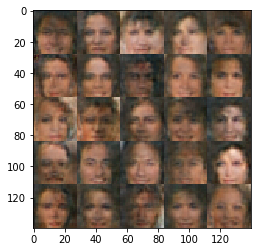

Epoch 1/1... Discriminator loss: 1.1843 Generator loss: 0.9379
Epoch 1/1... Discriminator loss: 1.2275 Generator loss: 0.8828
Epoch 1/1... Discriminator loss: 1.2035 Generator loss: 0.7944
Epoch 1/1... Discriminator loss: 1.2033 Generator loss: 0.9724
Epoch 1/1... Discriminator loss: 1.2099 Generator loss: 0.7564
Epoch 1/1... Discriminator loss: 1.4098 Generator loss: 0.8044
Epoch 1/1... Discriminator loss: 1.3013 Generator loss: 0.6719
Epoch 1/1... Discriminator loss: 1.3401 Generator loss: 1.2492
Epoch 1/1... Discriminator loss: 1.2452 Generator loss: 0.8125
Epoch 1/1... Discriminator loss: 1.3001 Generator loss: 0.7060


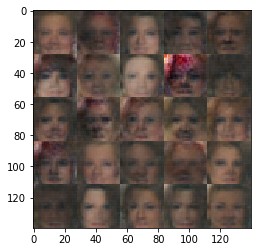

Epoch 1/1... Discriminator loss: 1.4319 Generator loss: 1.0365
Epoch 1/1... Discriminator loss: 1.1153 Generator loss: 0.8411
Epoch 1/1... Discriminator loss: 1.2032 Generator loss: 0.9684
Epoch 1/1... Discriminator loss: 1.2165 Generator loss: 0.7444
Epoch 1/1... Discriminator loss: 1.2329 Generator loss: 0.9489
Epoch 1/1... Discriminator loss: 1.1879 Generator loss: 0.8956
Epoch 1/1... Discriminator loss: 1.1873 Generator loss: 0.8292
Epoch 1/1... Discriminator loss: 1.1911 Generator loss: 0.9690
Epoch 1/1... Discriminator loss: 1.2795 Generator loss: 0.8502
Epoch 1/1... Discriminator loss: 1.2444 Generator loss: 0.7171


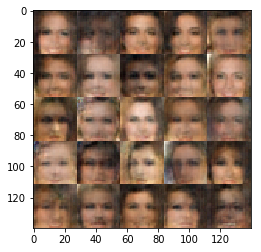

Epoch 1/1... Discriminator loss: 1.2180 Generator loss: 0.7435
Epoch 1/1... Discriminator loss: 1.2807 Generator loss: 0.7746
Epoch 1/1... Discriminator loss: 1.2256 Generator loss: 0.8277
Epoch 1/1... Discriminator loss: 1.1960 Generator loss: 0.8349
Epoch 1/1... Discriminator loss: 1.5825 Generator loss: 0.6429
Epoch 1/1... Discriminator loss: 1.0984 Generator loss: 0.9212
Epoch 1/1... Discriminator loss: 1.2691 Generator loss: 0.7709
Epoch 1/1... Discriminator loss: 1.3605 Generator loss: 0.7270
Epoch 1/1... Discriminator loss: 1.3390 Generator loss: 0.7725
Epoch 1/1... Discriminator loss: 1.2436 Generator loss: 0.8755


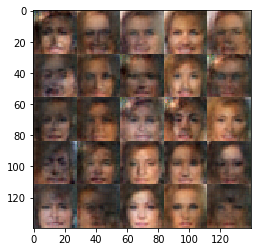

Epoch 1/1... Discriminator loss: 1.2185 Generator loss: 0.7727
Epoch 1/1... Discriminator loss: 1.2448 Generator loss: 0.7589
Epoch 1/1... Discriminator loss: 1.3349 Generator loss: 0.8346
Epoch 1/1... Discriminator loss: 1.2646 Generator loss: 0.9299
Epoch 1/1... Discriminator loss: 1.2794 Generator loss: 0.9173
Epoch 1/1... Discriminator loss: 1.1823 Generator loss: 0.8707
Epoch 1/1... Discriminator loss: 1.3341 Generator loss: 0.8449
Epoch 1/1... Discriminator loss: 1.2290 Generator loss: 0.7362
Epoch 1/1... Discriminator loss: 1.1842 Generator loss: 0.9555
Epoch 1/1... Discriminator loss: 1.3306 Generator loss: 0.6759


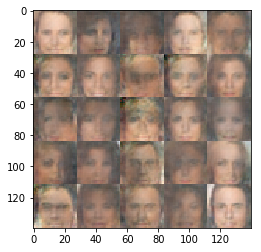

Epoch 1/1... Discriminator loss: 1.2270 Generator loss: 0.7931
Epoch 1/1... Discriminator loss: 1.3496 Generator loss: 0.7630
Epoch 1/1... Discriminator loss: 1.2758 Generator loss: 0.7295
Epoch 1/1... Discriminator loss: 1.3400 Generator loss: 0.7115
Epoch 1/1... Discriminator loss: 1.1982 Generator loss: 0.9051
Epoch 1/1... Discriminator loss: 1.1469 Generator loss: 0.8368
Epoch 1/1... Discriminator loss: 1.3342 Generator loss: 0.9815
Epoch 1/1... Discriminator loss: 1.1514 Generator loss: 0.9180
Epoch 1/1... Discriminator loss: 1.2386 Generator loss: 0.7417
Epoch 1/1... Discriminator loss: 1.2773 Generator loss: 0.8292


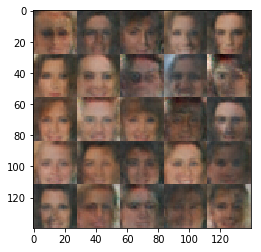

Epoch 1/1... Discriminator loss: 1.2716 Generator loss: 0.7223
Epoch 1/1... Discriminator loss: 1.2045 Generator loss: 0.7488
Epoch 1/1... Discriminator loss: 1.2071 Generator loss: 0.7932
Epoch 1/1... Discriminator loss: 1.2509 Generator loss: 0.8509
Epoch 1/1... Discriminator loss: 1.3078 Generator loss: 0.9445
Epoch 1/1... Discriminator loss: 1.4237 Generator loss: 0.7824
Epoch 1/1... Discriminator loss: 1.1909 Generator loss: 0.7954
Epoch 1/1... Discriminator loss: 1.1699 Generator loss: 0.8270
Epoch 1/1... Discriminator loss: 1.3068 Generator loss: 0.8786
Epoch 1/1... Discriminator loss: 1.3396 Generator loss: 0.9136


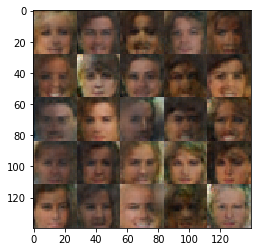

Epoch 1/1... Discriminator loss: 1.1760 Generator loss: 0.9059
Epoch 1/1... Discriminator loss: 1.2695 Generator loss: 0.7805
Epoch 1/1... Discriminator loss: 1.3735 Generator loss: 0.9193
Epoch 1/1... Discriminator loss: 1.1504 Generator loss: 0.9691
Epoch 1/1... Discriminator loss: 1.1891 Generator loss: 0.6727
Epoch 1/1... Discriminator loss: 1.3110 Generator loss: 0.7058
Epoch 1/1... Discriminator loss: 1.1795 Generator loss: 0.7937
Epoch 1/1... Discriminator loss: 1.4515 Generator loss: 0.8137
Epoch 1/1... Discriminator loss: 1.1785 Generator loss: 1.0004
Epoch 1/1... Discriminator loss: 1.2977 Generator loss: 0.7580


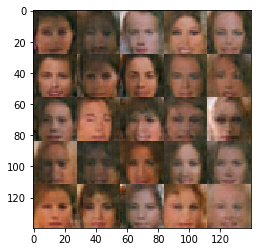

Epoch 1/1... Discriminator loss: 1.4681 Generator loss: 0.6444
Epoch 1/1... Discriminator loss: 1.3186 Generator loss: 0.8579
Epoch 1/1... Discriminator loss: 1.2012 Generator loss: 0.8780
Epoch 1/1... Discriminator loss: 1.2381 Generator loss: 0.8523
Epoch 1/1... Discriminator loss: 1.2346 Generator loss: 0.7884
Epoch 1/1... Discriminator loss: 1.2269 Generator loss: 0.8911
Epoch 1/1... Discriminator loss: 1.2846 Generator loss: 0.7462
Epoch 1/1... Discriminator loss: 1.3106 Generator loss: 0.6607
Epoch 1/1... Discriminator loss: 1.2571 Generator loss: 0.8159
Epoch 1/1... Discriminator loss: 1.1920 Generator loss: 0.8992


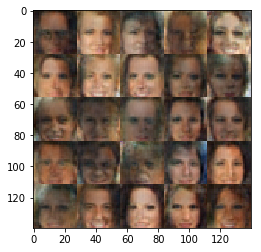

Epoch 1/1... Discriminator loss: 1.1993 Generator loss: 0.7543
Epoch 1/1... Discriminator loss: 1.1878 Generator loss: 0.7363
Epoch 1/1... Discriminator loss: 1.3492 Generator loss: 0.7038
Epoch 1/1... Discriminator loss: 1.4206 Generator loss: 0.7727
Epoch 1/1... Discriminator loss: 1.2606 Generator loss: 0.8165
Epoch 1/1... Discriminator loss: 1.2787 Generator loss: 0.7604
Epoch 1/1... Discriminator loss: 1.2197 Generator loss: 0.7484
Epoch 1/1... Discriminator loss: 1.2469 Generator loss: 0.7452
Epoch 1/1... Discriminator loss: 1.2193 Generator loss: 0.7312
Epoch 1/1... Discriminator loss: 1.2511 Generator loss: 0.8497


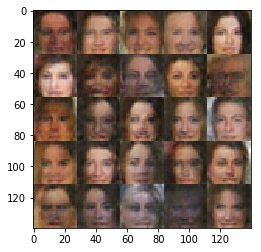

Epoch 1/1... Discriminator loss: 1.2892 Generator loss: 0.6360
Epoch 1/1... Discriminator loss: 1.4604 Generator loss: 0.6590
Epoch 1/1... Discriminator loss: 1.2387 Generator loss: 0.7645
Epoch 1/1... Discriminator loss: 1.3327 Generator loss: 0.7390
Epoch 1/1... Discriminator loss: 1.2584 Generator loss: 0.7547
Epoch 1/1... Discriminator loss: 1.2352 Generator loss: 0.7648
Epoch 1/1... Discriminator loss: 1.2232 Generator loss: 0.8296
Epoch 1/1... Discriminator loss: 1.2850 Generator loss: 0.7409
Epoch 1/1... Discriminator loss: 1.3696 Generator loss: 0.6274
Epoch 1/1... Discriminator loss: 1.4881 Generator loss: 0.5557


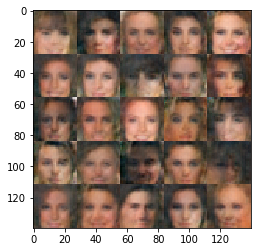

Epoch 1/1... Discriminator loss: 1.2002 Generator loss: 0.7091
Epoch 1/1... Discriminator loss: 1.3470 Generator loss: 0.6777
Epoch 1/1... Discriminator loss: 1.1866 Generator loss: 0.7588
Epoch 1/1... Discriminator loss: 1.3630 Generator loss: 0.7217
Epoch 1/1... Discriminator loss: 1.3878 Generator loss: 0.6212
Epoch 1/1... Discriminator loss: 1.2448 Generator loss: 0.6777
Epoch 1/1... Discriminator loss: 1.2781 Generator loss: 0.8296
Epoch 1/1... Discriminator loss: 1.2594 Generator loss: 0.8558
Epoch 1/1... Discriminator loss: 1.3201 Generator loss: 0.8822
Epoch 1/1... Discriminator loss: 1.4171 Generator loss: 0.6815


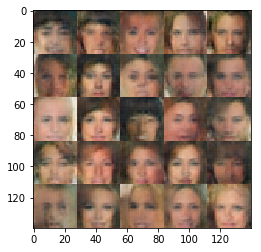

Epoch 1/1... Discriminator loss: 1.2468 Generator loss: 0.5940
Epoch 1/1... Discriminator loss: 1.3468 Generator loss: 0.7546
Epoch 1/1... Discriminator loss: 1.2021 Generator loss: 0.8444
Epoch 1/1... Discriminator loss: 1.2770 Generator loss: 0.6731
Epoch 1/1... Discriminator loss: 1.5120 Generator loss: 0.7074
Epoch 1/1... Discriminator loss: 1.2412 Generator loss: 0.7663
Epoch 1/1... Discriminator loss: 1.2126 Generator loss: 0.7768
Epoch 1/1... Discriminator loss: 1.2607 Generator loss: 0.6663
Epoch 1/1... Discriminator loss: 1.4517 Generator loss: 0.7973
Epoch 1/1... Discriminator loss: 1.2040 Generator loss: 0.8702


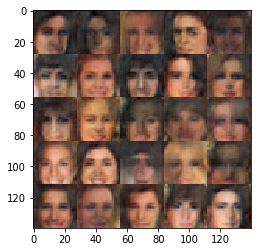

Epoch 1/1... Discriminator loss: 1.3023 Generator loss: 0.7503
Epoch 1/1... Discriminator loss: 1.3126 Generator loss: 0.7741
Epoch 1/1... Discriminator loss: 1.3528 Generator loss: 0.8148
Epoch 1/1... Discriminator loss: 1.3073 Generator loss: 0.7559
Epoch 1/1... Discriminator loss: 1.3366 Generator loss: 0.8247
Epoch 1/1... Discriminator loss: 1.2882 Generator loss: 0.7049
Epoch 1/1... Discriminator loss: 1.3685 Generator loss: 0.6597
Epoch 1/1... Discriminator loss: 1.2221 Generator loss: 0.7367
Epoch 1/1... Discriminator loss: 1.3641 Generator loss: 0.6286
Epoch 1/1... Discriminator loss: 1.2930 Generator loss: 0.7764


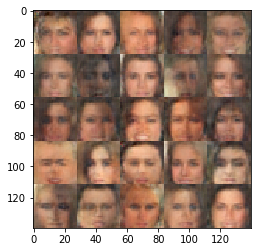

Epoch 1/1... Discriminator loss: 1.2823 Generator loss: 0.5739
Epoch 1/1... Discriminator loss: 1.2871 Generator loss: 0.7440
Epoch 1/1... Discriminator loss: 1.3425 Generator loss: 0.6872
Epoch 1/1... Discriminator loss: 1.1952 Generator loss: 0.6831
Epoch 1/1... Discriminator loss: 1.4253 Generator loss: 0.5847
Epoch 1/1... Discriminator loss: 1.3519 Generator loss: 0.6766
Epoch 1/1... Discriminator loss: 1.3614 Generator loss: 0.8827
Epoch 1/1... Discriminator loss: 1.3084 Generator loss: 0.7383
Epoch 1/1... Discriminator loss: 1.2903 Generator loss: 0.6766
Epoch 1/1... Discriminator loss: 1.3647 Generator loss: 0.7934


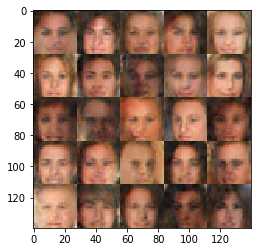

Epoch 1/1... Discriminator loss: 1.3147 Generator loss: 0.7503
Epoch 1/1... Discriminator loss: 1.1956 Generator loss: 0.7831
Epoch 1/1... Discriminator loss: 1.3805 Generator loss: 0.7903
Epoch 1/1... Discriminator loss: 1.2960 Generator loss: 0.6082
Epoch 1/1... Discriminator loss: 1.4100 Generator loss: 0.6345
Epoch 1/1... Discriminator loss: 1.3706 Generator loss: 0.7160
Epoch 1/1... Discriminator loss: 1.2676 Generator loss: 0.7637
Epoch 1/1... Discriminator loss: 1.2443 Generator loss: 0.7120
Epoch 1/1... Discriminator loss: 1.2585 Generator loss: 0.6813
Epoch 1/1... Discriminator loss: 1.3847 Generator loss: 0.7035


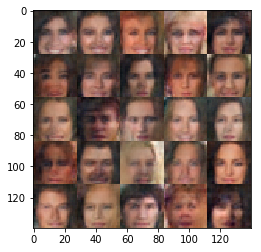

Epoch 1/1... Discriminator loss: 1.3298 Generator loss: 0.7745
Epoch 1/1... Discriminator loss: 1.2674 Generator loss: 0.7261
Epoch 1/1... Discriminator loss: 1.3027 Generator loss: 0.7676
Epoch 1/1... Discriminator loss: 1.2554 Generator loss: 0.7281
Epoch 1/1... Discriminator loss: 1.1749 Generator loss: 0.7557
Epoch 1/1... Discriminator loss: 1.3545 Generator loss: 0.6236
Epoch 1/1... Discriminator loss: 1.2964 Generator loss: 0.8872
Epoch 1/1... Discriminator loss: 1.2387 Generator loss: 0.7914
Epoch 1/1... Discriminator loss: 1.2589 Generator loss: 0.6921
Epoch 1/1... Discriminator loss: 1.2645 Generator loss: 0.8345


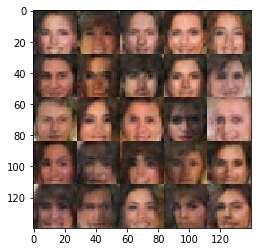

Epoch 1/1... Discriminator loss: 1.2650 Generator loss: 0.7879
Epoch 1/1... Discriminator loss: 1.3522 Generator loss: 1.1295
Epoch 1/1... Discriminator loss: 1.3014 Generator loss: 0.7472
Epoch 1/1... Discriminator loss: 1.2694 Generator loss: 0.8700
Epoch 1/1... Discriminator loss: 1.3308 Generator loss: 0.8374
Epoch 1/1... Discriminator loss: 1.3353 Generator loss: 0.6850
Epoch 1/1... Discriminator loss: 1.0983 Generator loss: 0.7628
Epoch 1/1... Discriminator loss: 1.3107 Generator loss: 0.7250
Epoch 1/1... Discriminator loss: 1.2529 Generator loss: 0.6606
Epoch 1/1... Discriminator loss: 1.3114 Generator loss: 0.6528


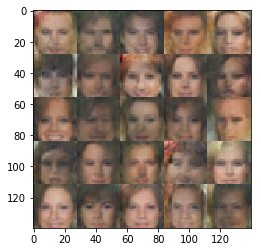

Epoch 1/1... Discriminator loss: 1.3728 Generator loss: 0.5943
Epoch 1/1... Discriminator loss: 1.1866 Generator loss: 0.7747
Epoch 1/1... Discriminator loss: 1.3716 Generator loss: 0.6530
Epoch 1/1... Discriminator loss: 1.2281 Generator loss: 0.7197
Epoch 1/1... Discriminator loss: 1.1556 Generator loss: 0.8568
Epoch 1/1... Discriminator loss: 1.3627 Generator loss: 0.7729
Epoch 1/1... Discriminator loss: 1.2870 Generator loss: 0.8398
Epoch 1/1... Discriminator loss: 1.2480 Generator loss: 0.7455
Epoch 1/1... Discriminator loss: 1.3572 Generator loss: 0.7232
Epoch 1/1... Discriminator loss: 1.2917 Generator loss: 0.6934


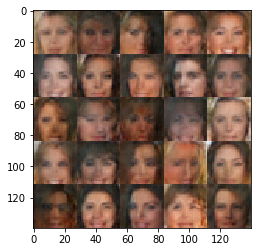

Epoch 1/1... Discriminator loss: 1.2465 Generator loss: 0.6857
Epoch 1/1... Discriminator loss: 1.3357 Generator loss: 0.7173
Epoch 1/1... Discriminator loss: 1.2487 Generator loss: 0.7774
Epoch 1/1... Discriminator loss: 1.2649 Generator loss: 0.6987
Epoch 1/1... Discriminator loss: 1.3216 Generator loss: 0.8516
Epoch 1/1... Discriminator loss: 1.2253 Generator loss: 0.6407
Epoch 1/1... Discriminator loss: 1.3067 Generator loss: 0.7881
Epoch 1/1... Discriminator loss: 1.1252 Generator loss: 0.8454
Epoch 1/1... Discriminator loss: 1.2834 Generator loss: 0.7361
Epoch 1/1... Discriminator loss: 1.2636 Generator loss: 0.7858


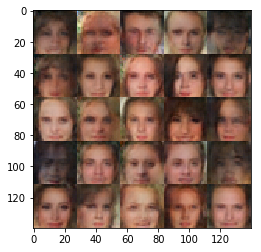

Epoch 1/1... Discriminator loss: 1.1880 Generator loss: 0.7131
Epoch 1/1... Discriminator loss: 1.3202 Generator loss: 0.6320
Epoch 1/1... Discriminator loss: 1.3730 Generator loss: 0.6589
Epoch 1/1... Discriminator loss: 1.2136 Generator loss: 0.7617
Epoch 1/1... Discriminator loss: 1.2134 Generator loss: 0.7397
Epoch 1/1... Discriminator loss: 1.4965 Generator loss: 0.6263
Epoch 1/1... Discriminator loss: 1.1735 Generator loss: 0.8542
Epoch 1/1... Discriminator loss: 1.2196 Generator loss: 0.6625
Epoch 1/1... Discriminator loss: 1.2915 Generator loss: 0.7012
Epoch 1/1... Discriminator loss: 1.2629 Generator loss: 0.7352


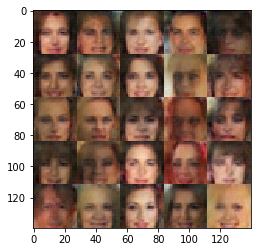

Epoch 1/1... Discriminator loss: 1.3300 Generator loss: 0.7887
Epoch 1/1... Discriminator loss: 1.2329 Generator loss: 0.8241
Epoch 1/1... Discriminator loss: 1.2989 Generator loss: 0.6406
Epoch 1/1... Discriminator loss: 1.3027 Generator loss: 0.8304
Epoch 1/1... Discriminator loss: 1.2579 Generator loss: 0.7109
Epoch 1/1... Discriminator loss: 1.3296 Generator loss: 0.6690
Epoch 1/1... Discriminator loss: 1.2459 Generator loss: 0.7675
Epoch 1/1... Discriminator loss: 1.2933 Generator loss: 0.7143
Epoch 1/1... Discriminator loss: 1.3772 Generator loss: 0.7848
Epoch 1/1... Discriminator loss: 1.3470 Generator loss: 0.6479


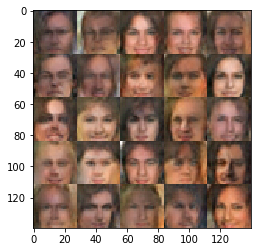

Epoch 1/1... Discriminator loss: 1.2306 Generator loss: 0.8595
Epoch 1/1... Discriminator loss: 1.2908 Generator loss: 0.7273
Epoch 1/1... Discriminator loss: 1.3075 Generator loss: 0.6919
Epoch 1/1... Discriminator loss: 1.1200 Generator loss: 0.6601
Epoch 1/1... Discriminator loss: 1.3687 Generator loss: 0.6438
Epoch 1/1... Discriminator loss: 1.3341 Generator loss: 0.6737
Epoch 1/1... Discriminator loss: 1.3691 Generator loss: 0.6594
Epoch 1/1... Discriminator loss: 1.2498 Generator loss: 0.7013
Epoch 1/1... Discriminator loss: 1.2948 Generator loss: 0.6615
Epoch 1/1... Discriminator loss: 1.3363 Generator loss: 0.7369


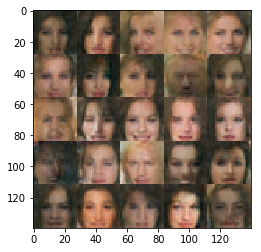

Epoch 1/1... Discriminator loss: 1.2684 Generator loss: 0.6644
Epoch 1/1... Discriminator loss: 1.4318 Generator loss: 0.6072
Epoch 1/1... Discriminator loss: 1.2913 Generator loss: 0.8592
Epoch 1/1... Discriminator loss: 1.2437 Generator loss: 0.6884
Epoch 1/1... Discriminator loss: 1.3724 Generator loss: 0.8364
Epoch 1/1... Discriminator loss: 1.1381 Generator loss: 0.8067
Epoch 1/1... Discriminator loss: 1.2896 Generator loss: 0.7031
Epoch 1/1... Discriminator loss: 1.2929 Generator loss: 0.8634
Epoch 1/1... Discriminator loss: 1.1880 Generator loss: 0.8249
Epoch 1/1... Discriminator loss: 1.2813 Generator loss: 0.6683


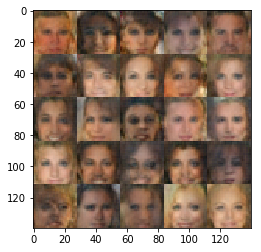

Epoch 1/1... Discriminator loss: 1.3601 Generator loss: 0.7079
Epoch 1/1... Discriminator loss: 1.2520 Generator loss: 0.7935
Epoch 1/1... Discriminator loss: 1.4046 Generator loss: 0.6829
Epoch 1/1... Discriminator loss: 1.1724 Generator loss: 0.7339
Epoch 1/1... Discriminator loss: 1.2831 Generator loss: 0.7770
Epoch 1/1... Discriminator loss: 1.3196 Generator loss: 0.6815
Epoch 1/1... Discriminator loss: 1.2709 Generator loss: 0.7819
Epoch 1/1... Discriminator loss: 1.3659 Generator loss: 0.6771
Epoch 1/1... Discriminator loss: 1.3032 Generator loss: 0.7279
Epoch 1/1... Discriminator loss: 1.3953 Generator loss: 0.7097


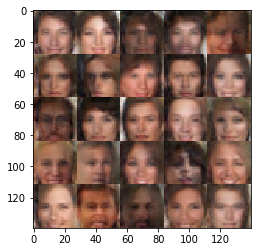

Epoch 1/1... Discriminator loss: 1.2624 Generator loss: 0.7183
Epoch 1/1... Discriminator loss: 1.2929 Generator loss: 0.8232
Epoch 1/1... Discriminator loss: 1.3041 Generator loss: 0.7257
Epoch 1/1... Discriminator loss: 1.3440 Generator loss: 0.6192
Epoch 1/1... Discriminator loss: 1.3417 Generator loss: 0.6641
Epoch 1/1... Discriminator loss: 1.2803 Generator loss: 0.7892
Epoch 1/1... Discriminator loss: 1.3736 Generator loss: 0.8306
Epoch 1/1... Discriminator loss: 1.3857 Generator loss: 0.6846
Epoch 1/1... Discriminator loss: 1.3595 Generator loss: 0.6355
Epoch 1/1... Discriminator loss: 1.2378 Generator loss: 0.6821


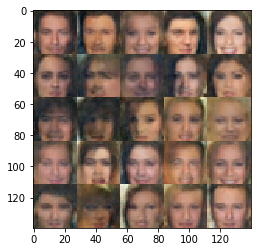

Epoch 1/1... Discriminator loss: 1.3678 Generator loss: 0.6886
Epoch 1/1... Discriminator loss: 1.2154 Generator loss: 0.7545
Epoch 1/1... Discriminator loss: 1.3078 Generator loss: 0.7275
Epoch 1/1... Discriminator loss: 1.2998 Generator loss: 0.7205
Epoch 1/1... Discriminator loss: 1.2872 Generator loss: 0.7899
Epoch 1/1... Discriminator loss: 1.2122 Generator loss: 0.7070
Epoch 1/1... Discriminator loss: 1.2012 Generator loss: 0.7383
Epoch 1/1... Discriminator loss: 1.2085 Generator loss: 0.7707
Epoch 1/1... Discriminator loss: 1.3171 Generator loss: 0.7377
Epoch 1/1... Discriminator loss: 1.2991 Generator loss: 0.7443


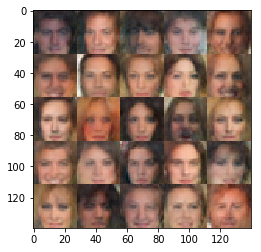

Epoch 1/1... Discriminator loss: 1.1560 Generator loss: 0.7903
Epoch 1/1... Discriminator loss: 1.2553 Generator loss: 0.7314
Epoch 1/1... Discriminator loss: 1.3730 Generator loss: 0.6349
Epoch 1/1... Discriminator loss: 1.3503 Generator loss: 0.6762
Epoch 1/1... Discriminator loss: 1.3022 Generator loss: 0.6469
Epoch 1/1... Discriminator loss: 1.3080 Generator loss: 0.8953
Epoch 1/1... Discriminator loss: 1.3991 Generator loss: 0.7462
Epoch 1/1... Discriminator loss: 1.5779 Generator loss: 0.5019
Epoch 1/1... Discriminator loss: 1.2440 Generator loss: 0.7146
Epoch 1/1... Discriminator loss: 1.3842 Generator loss: 0.6340


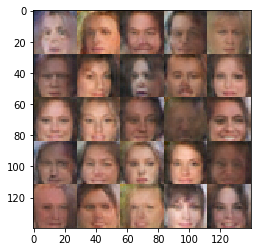

Epoch 1/1... Discriminator loss: 1.2564 Generator loss: 0.7449
Epoch 1/1... Discriminator loss: 1.2823 Generator loss: 0.7216
Epoch 1/1... Discriminator loss: 1.2845 Generator loss: 0.8191
Epoch 1/1... Discriminator loss: 1.3034 Generator loss: 0.7545
Epoch 1/1... Discriminator loss: 1.3792 Generator loss: 0.7162
Epoch 1/1... Discriminator loss: 1.4373 Generator loss: 0.6836
Epoch 1/1... Discriminator loss: 1.2626 Generator loss: 0.8467
Epoch 1/1... Discriminator loss: 1.3348 Generator loss: 0.6954
Epoch 1/1... Discriminator loss: 1.2756 Generator loss: 0.6563
Epoch 1/1... Discriminator loss: 1.2913 Generator loss: 0.7060


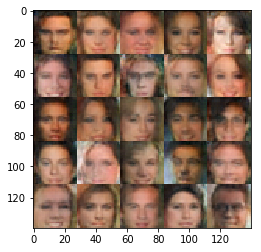

Epoch 1/1... Discriminator loss: 1.2775 Generator loss: 0.6197
Epoch 1/1... Discriminator loss: 1.2884 Generator loss: 0.7221
Epoch 1/1... Discriminator loss: 1.2859 Generator loss: 0.8067
Epoch 1/1... Discriminator loss: 1.4675 Generator loss: 0.6822
Epoch 1/1... Discriminator loss: 1.2960 Generator loss: 0.6375
Epoch 1/1... Discriminator loss: 1.4115 Generator loss: 0.8048
Epoch 1/1... Discriminator loss: 1.2665 Generator loss: 0.7593
Epoch 1/1... Discriminator loss: 1.2709 Generator loss: 0.7718
Epoch 1/1... Discriminator loss: 1.2430 Generator loss: 0.8056
Epoch 1/1... Discriminator loss: 1.3852 Generator loss: 0.7404


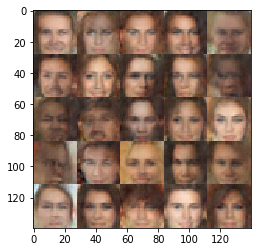

Epoch 1/1... Discriminator loss: 1.3716 Generator loss: 0.7200
Epoch 1/1... Discriminator loss: 1.1814 Generator loss: 1.0247
Epoch 1/1... Discriminator loss: 1.2409 Generator loss: 0.8153
Epoch 1/1... Discriminator loss: 1.2604 Generator loss: 0.7410
Epoch 1/1... Discriminator loss: 1.2902 Generator loss: 0.7329
Epoch 1/1... Discriminator loss: 1.4432 Generator loss: 0.9540
Epoch 1/1... Discriminator loss: 1.3297 Generator loss: 0.7017
Epoch 1/1... Discriminator loss: 1.3646 Generator loss: 0.7650
Epoch 1/1... Discriminator loss: 1.2476 Generator loss: 0.6096
Epoch 1/1... Discriminator loss: 1.4377 Generator loss: 0.7396


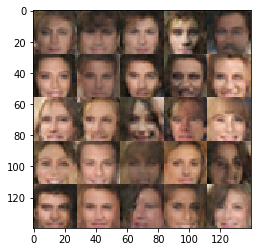

Epoch 1/1... Discriminator loss: 1.2961 Generator loss: 0.7290
Epoch 1/1... Discriminator loss: 1.3380 Generator loss: 0.7233
Epoch 1/1... Discriminator loss: 1.3820 Generator loss: 0.6835
Epoch 1/1... Discriminator loss: 1.1904 Generator loss: 0.7521
Epoch 1/1... Discriminator loss: 1.2768 Generator loss: 0.7865
Epoch 1/1... Discriminator loss: 1.2232 Generator loss: 0.8265
Epoch 1/1... Discriminator loss: 1.4652 Generator loss: 0.6658
Epoch 1/1... Discriminator loss: 1.3206 Generator loss: 0.7367
Epoch 1/1... Discriminator loss: 1.4104 Generator loss: 0.6490
Epoch 1/1... Discriminator loss: 1.3449 Generator loss: 0.7119


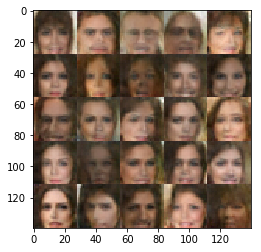

Epoch 1/1... Discriminator loss: 1.2068 Generator loss: 0.7455
Epoch 1/1... Discriminator loss: 1.3173 Generator loss: 0.7020
Epoch 1/1... Discriminator loss: 1.2417 Generator loss: 0.7608
Epoch 1/1... Discriminator loss: 1.2288 Generator loss: 0.7986
Epoch 1/1... Discriminator loss: 1.3687 Generator loss: 0.7321
Epoch 1/1... Discriminator loss: 1.4065 Generator loss: 0.7348
Epoch 1/1... Discriminator loss: 1.4872 Generator loss: 0.6820
Epoch 1/1... Discriminator loss: 1.3273 Generator loss: 0.7034
Epoch 1/1... Discriminator loss: 1.3244 Generator loss: 0.6365
Epoch 1/1... Discriminator loss: 1.2665 Generator loss: 0.8367


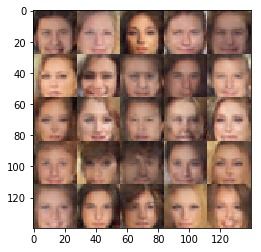

Epoch 1/1... Discriminator loss: 1.3745 Generator loss: 0.8308
Epoch 1/1... Discriminator loss: 1.3825 Generator loss: 0.5724
Epoch 1/1... Discriminator loss: 1.2734 Generator loss: 0.7042
Epoch 1/1... Discriminator loss: 1.3833 Generator loss: 0.7722
Epoch 1/1... Discriminator loss: 1.3107 Generator loss: 0.7668
Epoch 1/1... Discriminator loss: 1.3360 Generator loss: 0.7691
Epoch 1/1... Discriminator loss: 1.3205 Generator loss: 0.7038
Epoch 1/1... Discriminator loss: 1.3182 Generator loss: 0.7607
Epoch 1/1... Discriminator loss: 1.3084 Generator loss: 0.7491
Epoch 1/1... Discriminator loss: 1.2493 Generator loss: 0.7162


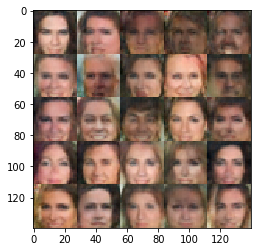

Epoch 1/1... Discriminator loss: 1.3493 Generator loss: 0.6137
Epoch 1/1... Discriminator loss: 1.3496 Generator loss: 0.7519
Epoch 1/1... Discriminator loss: 1.3679 Generator loss: 0.6953
Epoch 1/1... Discriminator loss: 1.3699 Generator loss: 0.6058
Epoch 1/1... Discriminator loss: 1.2805 Generator loss: 0.7331
Epoch 1/1... Discriminator loss: 1.2956 Generator loss: 0.6993
Epoch 1/1... Discriminator loss: 1.2723 Generator loss: 0.7204
Epoch 1/1... Discriminator loss: 1.3144 Generator loss: 0.6366
Epoch 1/1... Discriminator loss: 1.2650 Generator loss: 0.8463
Epoch 1/1... Discriminator loss: 1.3348 Generator loss: 0.7381


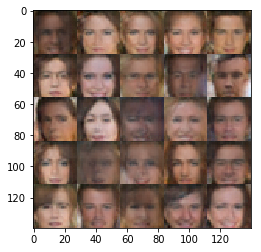

Epoch 1/1... Discriminator loss: 1.3662 Generator loss: 0.7638
Epoch 1/1... Discriminator loss: 1.2399 Generator loss: 0.6908
Epoch 1/1... Discriminator loss: 1.3953 Generator loss: 0.7316
Epoch 1/1... Discriminator loss: 1.2721 Generator loss: 0.7349
Epoch 1/1... Discriminator loss: 1.4343 Generator loss: 0.7001
Epoch 1/1... Discriminator loss: 1.2745 Generator loss: 0.7996
Epoch 1/1... Discriminator loss: 1.3752 Generator loss: 0.7066
Epoch 1/1... Discriminator loss: 1.2259 Generator loss: 0.7055
Epoch 1/1... Discriminator loss: 1.3256 Generator loss: 0.7207
Epoch 1/1... Discriminator loss: 1.2286 Generator loss: 0.6768


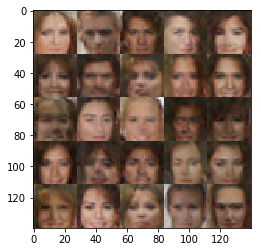

Epoch 1/1... Discriminator loss: 1.3190 Generator loss: 0.7582
Epoch 1/1... Discriminator loss: 1.2534 Generator loss: 0.7528
Epoch 1/1... Discriminator loss: 1.3445 Generator loss: 0.8507
Epoch 1/1... Discriminator loss: 1.1808 Generator loss: 0.7137
Epoch 1/1... Discriminator loss: 1.4511 Generator loss: 0.6752
Epoch 1/1... Discriminator loss: 1.3387 Generator loss: 0.7514
Epoch 1/1... Discriminator loss: 1.2050 Generator loss: 0.6746
Epoch 1/1... Discriminator loss: 1.3664 Generator loss: 0.6898
Epoch 1/1... Discriminator loss: 1.4438 Generator loss: 0.7443
Epoch 1/1... Discriminator loss: 1.2634 Generator loss: 0.6715


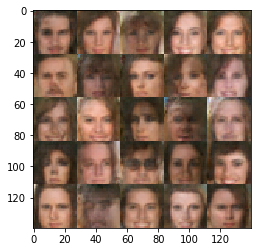

Epoch 1/1... Discriminator loss: 1.3507 Generator loss: 0.7849
Epoch 1/1... Discriminator loss: 1.3803 Generator loss: 0.7252
Epoch 1/1... Discriminator loss: 1.3542 Generator loss: 0.6613


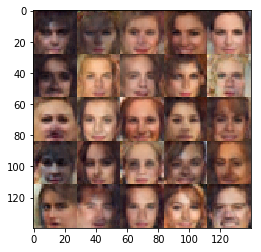

Total execution time...52.416249469916025


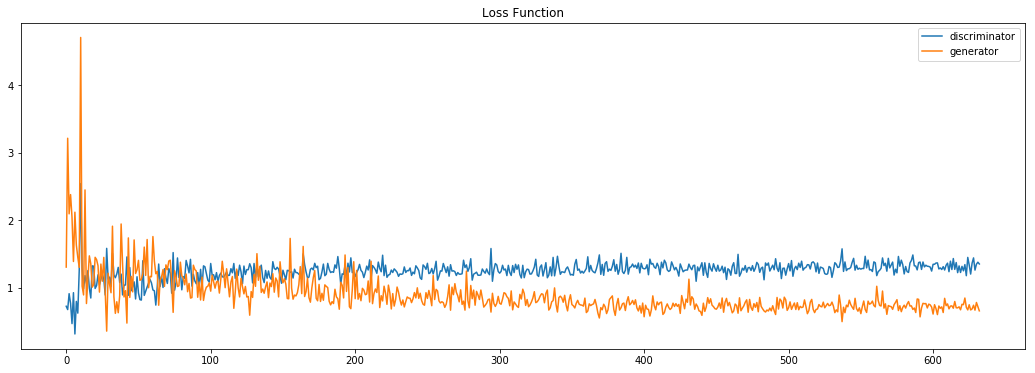

In [13]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.